## Problem statement

An E Commerce company or DTH (you can choose either of these two domains) provider is 
facing a lot of competition in the current market and it has become a challenge to retain the 
existing customers in the current situation. Hence, the company wants to develop a model 
through which they can do churn prediction of the accounts and provide segmented offers to the 
potential churners. In this company, account churn is a major thing because 1 account can have 
multiple customers. hence by losing one account the company might be losing more than one 
customer.
You have been assigned to develop a churn prediction model for this company and provide 
business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because 
your recommendation will go through the revenue assurance team. If they find that you are 
giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going 
to approve your recommendation. 
Hence be very careful while providing campaign recommendation

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.19.2
Pandas Version 1.1.3
Seaborn Version 0.11.0
Matplotlib Version 3.3.2


## Reading and check dataset

In [3]:
CC = pd.read_excel("Customer Churn Data.xlsx", sheet_name="Data for DSBA")
CC.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


### Shape of dataset

In [4]:
## Shape of dataset
CC.shape

(11260, 19)

In [5]:
CC.size

213940

In [6]:
## High level information
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

<b> Observations: </b> 

- Tenure is a numeric field but has been read as object. Maybe there is non-numeric information present in that. 
- City_Tier is a categorical field that takes values 1,2,3. It has been read as float. 
- CC_Contacted_LY is a continuous field that takes integer values. It has been read as float. 
- Service score is an ordinal categorical field and has been read as float. 
- Account user count contains numerical values but has been read as an object. It probably contains special characters that needs clean up.
- Account segment is also a categorical variable, but the order is not provided in the data dictionary (whether super is above HNI or HNI is above Super is not known). Hence it will need to be treated with one hot encoding instead of label encoding.
- CC Agent score is also an ordinal variable with integer values and it has been read in as float. 
- rev_per_month is the monthly average revenue generated every month. It should have been a numeric field, but has been 
    read in as an object field. It probably requires data cleaning.
- Complain_ly has numeric integer values and has been read in as float
- rev_growth_yoy, coupon_used_for_payment, Day_Since_CC_connect, cashback, contain numeric values, but have been read as object field. They probably require data clean up.

### Basic descriptive statistics

In [7]:
CC.drop('AccountID',axis=1).describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260,NaN,NaN,NaN,0.168384,0.374223,0,0,0,0,1
Tenure,11158,38,1,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148,NaN,NaN,NaN,1.65393,0.915015,1,1,1,3,3
CC_Contacted_LY,11158,NaN,NaN,NaN,17.8671,8.85327,4,11,16,23,132
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162,NaN,NaN,NaN,2.90253,0.725584,0,2,3,3,5
Account_user_count,11148,7,4,4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144,NaN,NaN,NaN,3.06649,1.37977,1,2,3,4,5


In [8]:
CC.drop('AccountID',axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.0,3.0,4.0,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.0,0.0,1.0,1.0


### Check for duplicates

In [9]:
## Are there duplicates? 
CC.duplicated().sum()   ## No row duplicates

0

### Null checks

In [10]:
## Are there nulls? How many and in what columns? 
CC.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

<b> Observations: </b> No nulls in ID and target columns

In [11]:
## Proportion of nulls in predictors out of total size of the predictor dataset expressed as percentage
CC_predictor = CC.drop(['AccountID','Churn'],axis=1)

round(((CC_predictor.isnull().sum().sum()/ CC_predictor.size) * 100 ),2)

1.4

In [12]:
## Nulls by rows

CC_predictor.isnull().sum(axis = 1)

0        0
1        0
2        1
3        0
4        0
        ..
11255    0
11256    0
11257    0
11258    0
11259    0
Length: 11260, dtype: int64

In [13]:
CC_predictor_temp = CC_predictor[CC_predictor.isnull().sum(axis = 1) >= 3]
CC_predictor_temp

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [14]:
CC_predictor_temp = CC_predictor[CC_predictor.isnull().sum(axis = 1) == 2]
CC_predictor_temp.shape

(121, 17)

<b> Observations: </b> There are 0 rows that have 3 or more nulls. There are 121 rows that have 2 nulls. 2/17 predictors = 11.7% of predictor variables is null. This is not a huge number. Hence rows will not be dropped due to presence of nulls.

In [15]:
## Percentage nulls by column in predictor dataset
round((CC_predictor.isnull().sum().sort_values(ascending = False)/CC_predictor.index.size ) * 100, 2)

cashback                   4.18
Complain_ly                3.17
Day_Since_CC_connect       3.17
Login_device               1.96
Marital_Status             1.88
CC_Agent_Score             1.03
Account_user_count         0.99
City_Tier                  0.99
Payment                    0.97
Gender                     0.96
rev_per_month              0.91
CC_Contacted_LY            0.91
Tenure                     0.91
Service_Score              0.87
account_segment            0.86
rev_growth_yoy             0.00
coupon_used_for_payment    0.00
dtype: float64

<b> Observations </b> : The maximum nulls in the dataset is in cashback column and it contains 4% of nulls. Columns will not be dropped due to presence of nulls. If there were columns that contained more than 30% nulls, we might consider dropping those columns. 

In [16]:
## Visual inspection of missing values

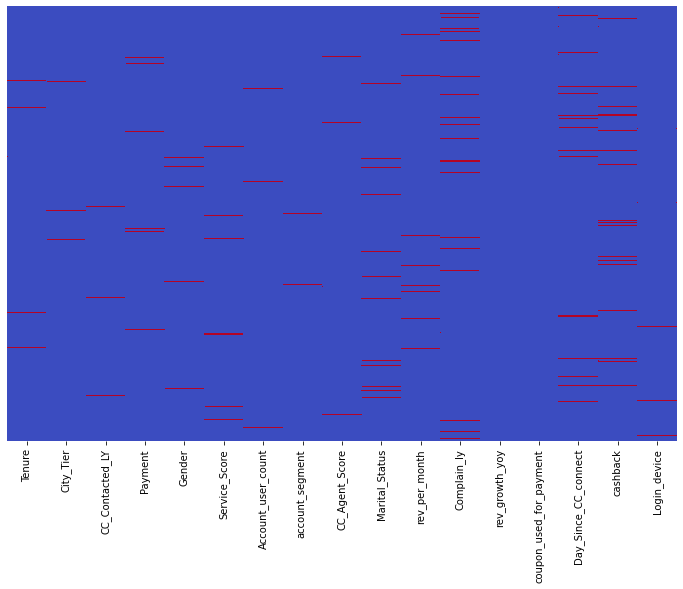

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(CC_predictor.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

### Data Clean up

In [18]:
## Tenure field 

CC.Tenure.value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
99     131
27     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64

In [19]:
##Replacing # in tenure with nulls. There are 116 rows where Tenure has the value '#'. Filling this with np.nan

CC['Tenure'] = CC['Tenure'].replace('#',np.nan)

In [20]:
CC.Tenure.value_counts(dropna=False)

1.0     1351
0.0     1231
8.0      519
9.0      496
7.0      450
10.0     423
3.0      410
5.0      403
4.0      403
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     311
16.0     291
19.0     273
18.0     253
NaN      218
20.0     217
17.0     215
21.0     170
23.0     169
22.0     151
24.0     147
28.0     137
30.0     137
27.0     131
99.0     131
26.0     122
29.0     114
25.0     114
31.0      96
51.0       2
60.0       2
61.0       2
50.0       2
Name: Tenure, dtype: int64

In [21]:
## Check City_tier column

CC.City_Tier.value_counts(dropna=False)  # No data cleanup is required, just null imputation

1.0    7263
3.0    3405
2.0     480
NaN     112
Name: City_Tier, dtype: int64

In [22]:
## Check CC_Contacted_LY column

CC.CC_Contacted_LY.value_counts(dropna=False)  # No data cleanup is required, just null imputation

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
31.0     165
35.0     165
33.0     155
36.0     148
NaN      102
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
5.0        8
43.0       8
132.0      1
127.0      1
129.0      1
4.0        1
126.0      1
Name: CC_Contacted_LY, dtype: int64

In [23]:
## Check payment

CC.Payment.value_counts(dropna=False)

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
NaN                  109
Name: Payment, dtype: int64

In [24]:
## Check Gender

CC.Gender.value_counts(dropna=False)

Male      6328
Female    4178
M          376
F          270
NaN        108
Name: Gender, dtype: int64

In [25]:
CC['Gender'] = CC['Gender'].replace('M','Male')

In [26]:
CC['Gender'] = CC['Gender'].replace('F','Female')

In [27]:
CC.Gender.value_counts(dropna=False)

Male      6704
Female    4448
NaN        108
Name: Gender, dtype: int64

In [28]:
## Check Service_Score

CC.Service_Score.value_counts(dropna=False)  # No data cleanup is required, just null imputation

3.0    5490
2.0    3251
4.0    2331
NaN      98
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [29]:
## Check Account_user_count

CC.Account_user_count.value_counts(dropna=False)  # Data clean up required to remove @

4      4569
3      3261
5      1699
2       526
1       446
@       332
6       315
NaN     112
Name: Account_user_count, dtype: int64

In [30]:
CC['Account_user_count'] = CC['Account_user_count'].replace('@',np.nan)

In [31]:
CC.Account_user_count.value_counts(dropna=False)  

4.0    4569
3.0    3261
5.0    1699
2.0     526
1.0     446
NaN     444
6.0     315
Name: Account_user_count, dtype: int64

In [32]:
## Check account_segment

CC.account_segment.value_counts(dropna=False)  ## Clean up required for plus, +

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
NaN               97
Super +           47
Name: account_segment, dtype: int64

In [33]:
CC['account_segment'] = CC['account_segment'].replace( {'Regular +': 'Regular_Plus', 'Super +': 'Super_Plus', 'Super Plus': 'Super_Plus', 'Regular Plus': 'Regular_Plus'} )
## Hyphenating the field values as it will become column names when one hot encoded

In [34]:
CC.account_segment.value_counts(dropna=False)

Regular_Plus    4124
Super           4062
HNI             1639
Super_Plus       818
Regular          520
NaN               97
Name: account_segment, dtype: int64

In [35]:
## Check CC_Agent_Score

CC.CC_Agent_Score.value_counts(dropna=False)  ## No clean up required; Just null imputation

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
NaN     116
Name: CC_Agent_Score, dtype: int64

In [36]:
## Check Marital_Status

CC.Marital_Status.value_counts(dropna=False)  ## No clean up required; Just null imputation

Married     5860
Single      3520
Divorced    1668
NaN          212
Name: Marital_Status, dtype: int64

In [37]:
## Check rev_per_month

CC.rev_per_month.value_counts(dropna=False)  ## Clean up required; + needs to be removed

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
NaN     102
13       93
14       48
15       24
102       8
123       5
124       5
107       5
140       4
118       4
136       4
129       4
133       4
126       3
127       3
101       3
130       3
108       3
113       3
115       3
116       3
117       3
119       3
137       3
138       3
110       3
19        2
131       2
134       2
139       2
125       2
22        2
105       2
114       2
120       2
121       2
20        1
21        1
23        1
25        1
103       1
104       1
109       1
111       1
135       1
122       1
100       1
Name: rev_per_month, dtype: int64

In [38]:
CC['rev_per_month'] = CC['rev_per_month'].replace('+',np.nan)

In [39]:
## Check Complain_ly

CC.Complain_ly.value_counts(dropna=False)   ## No need for data clean up; just null imputation

0.0    7792
1.0    3111
NaN     357
Name: Complain_ly, dtype: int64

In [40]:
## Check rev_growth_yoy

CC.rev_growth_yoy.value_counts(dropna=False)   ## $ is present in 3 rows - needs to be cleaned up

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [41]:
CC['rev_growth_yoy'] = CC['rev_growth_yoy'].replace('$',np.nan)

In [42]:
CC.rev_growth_yoy.value_counts(dropna=False)

14.0    1524
13.0    1427
15.0    1283
12.0    1210
16.0     949
18.0     708
17.0     704
19.0     619
20.0     562
11.0     523
21.0     433
22.0     403
23.0     345
24.0     229
25.0     188
26.0      98
27.0      35
28.0      14
4.0        3
NaN        3
Name: rev_growth_yoy, dtype: int64

In [43]:
## Check coupon_used_for_payment

CC.coupon_used_for_payment.value_counts(dropna=False) ## data clean up required for #, * and $

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
$        1
#        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [44]:
CC['coupon_used_for_payment'] = CC['coupon_used_for_payment'].replace( {'#': np.nan, '*': np.nan, '$': np.nan} )

In [45]:
CC.coupon_used_for_payment.value_counts(dropna=False)

1.0     4373
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
10.0      34
9.0       34
11.0      30
12.0      26
13.0      22
14.0      12
16.0       4
15.0       4
NaN        3
Name: coupon_used_for_payment, dtype: int64

In [46]:
## Check Day_Since_CC_connect

CC.Day_Since_CC_connect.value_counts(dropna=False) ## data clean up required for $

3      1816
2      1574
1      1256
8      1169
0       964
7       911
4       893
9       622
5       479
NaN     357
10      339
6       229
11      183
12      146
13      117
14       74
15       37
17       34
16       26
18       26
47        2
30        2
31        2
46        1
$         1
Name: Day_Since_CC_connect, dtype: int64

In [47]:
CC['Day_Since_CC_connect'] = CC['Day_Since_CC_connect'].replace('$',np.nan)

In [48]:
CC.Day_Since_CC_connect.value_counts(dropna=False)

3.0     1816
2.0     1574
1.0     1256
8.0     1169
0.0      964
7.0      911
4.0      893
9.0      622
5.0      479
NaN      358
10.0     339
6.0      229
11.0     183
12.0     146
13.0     117
14.0      74
15.0      37
17.0      34
16.0      26
18.0      26
31.0       2
30.0       2
47.0       2
46.0       1
Name: Day_Since_CC_connect, dtype: int64

In [49]:
## Check cashback

CC.cashback.value_counts(dropna=False) ## data clean up required for $

NaN       471
155.62     10
149.68      9
149.36      9
152.28      9
         ... 
185.81      1
163.42      1
140.81      1
142.09      1
200.31      1
Name: cashback, Length: 5694, dtype: int64

In [50]:
CC[CC['cashback'] == '$']

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
440,20440,0,0.0,1.0,16.0,Credit Card,Male,3.0,2.0,Regular_Plus,3.0,Single,2.0,0.0,18.0,1.0,2.0,$,Mobile
1257,21257,0,4.0,1.0,9.0,Credit Card,Male,2.0,3.0,Regular_Plus,5.0,Married,NaN,NaN,13.0,0.0,3.0,$,Computer


In [51]:
CC['cashback'] = CC['cashback'].replace('$',np.nan)

In [52]:
CC.cashback.dtype

dtype('float64')

In [53]:
## Check Login_device

CC.Login_device.value_counts(dropna=False) ## data clean up required for &&&&

Mobile      7482
Computer    3018
&&&&         539
NaN          221
Name: Login_device, dtype: int64

In [54]:
CC['Login_device'] = CC['Login_device'].replace('&&&&',np.nan)

In [55]:
CC.Login_device.value_counts(dropna=False)

Mobile      7482
Computer    3018
NaN          760
Name: Login_device, dtype: int64

In [56]:
## Descriptive statistics after data cleanup

CC.drop("AccountID", axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
Tenure,11042.0,11.025086,12.879782,0.0,2.00,9.00,16.00,99.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.00,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.00,3.00,5.0
Account_user_count,10816.0,3.692862,1.022976,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.00,4.00,5.0
rev_per_month,10469.0,6.362594,11.909686,1.0,3.00,5.00,7.00,140.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.00,1.00,1.0
rev_growth_yoy,11257.0,16.193391,3.757721,4.0,13.00,15.00,19.00,28.0


### Null check after data clean up

In [57]:
CC_predictor = CC.drop(['AccountID','Churn'],axis=1)

print("\nTotal number of nulls in all predictor fields ")
print(CC_predictor.isnull().sum().sum())

print("\nTotal % nulls in all predictor fields ")
print(round(((CC_predictor.isnull().sum().sum()/ CC_predictor.size) * 100 ),2))

## Percentage nulls by column in predictor dataset
print("\n\nProportion of nulls by column - multiply by 100 for percentage")
print(CC_predictor.isnull().sum().sort_values(ascending = False)/CC_predictor.index.size)

## Rows that have more than 4 null fields
print("\n\nRows that have more than 4 null fields")
CC_predictor_temp = CC_predictor[CC_predictor.isnull().sum(axis = 1) >= 4]
CC_predictor_temp


Total number of nulls in all predictor fields 
4361

Total % nulls in all predictor fields 
2.28


Proportion of nulls by column - multiply by 100 for percentage
rev_per_month              0.070249
Login_device               0.067496
cashback                   0.042007
Account_user_count         0.039432
Day_Since_CC_connect       0.031794
Complain_ly                0.031705
Tenure                     0.019361
Marital_Status             0.018828
CC_Agent_Score             0.010302
City_Tier                  0.009947
Payment                    0.009680
Gender                     0.009591
CC_Contacted_LY            0.009059
Service_Score              0.008703
account_segment            0.008615
rev_growth_yoy             0.000266
coupon_used_for_payment    0.000266
dtype: float64


Rows that have more than 4 null fields


,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


<b> Observation : </b> Maximum % nulls in a column is 7%. It is still under 30%. So nulls will be treated as opposed to considering dropping any column. 

There are 1017 rows having >= 2 null fields. There are 333 rows having >=3 null fields. There are no rows that have >=4 null fields. 

### Outlier check

In [58]:
## Making a separate list for numeric and categorical columns

num_cols = ['Tenure', 'CC_Contacted_LY', 'rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']
cat_cols = ['City_Tier','Payment','Gender','Service_Score','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','Complain_ly','Login_device']

In [59]:
## Get upper bound and lower bound
Q1 = CC_predictor[num_cols].quantile(0.25)
Q3 = CC_predictor[num_cols].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [60]:
print ("Proportion of outliers in numeric continuous columns \n")
(((CC_predictor[num_cols] > UL) | (CC_predictor[num_cols] < LL)).sum())/ CC_predictor.shape[0]

Proportion of outliers in numeric continuous columns 



Tenure                     0.012345
CC_Contacted_LY            0.003730
rev_per_month              0.016430
rev_growth_yoy             0.000000
coupon_used_for_payment    0.122558
Day_Since_CC_connect       0.002931
cashback                   0.078064
dtype: float64

In [61]:
print ("Number of outliers in numeric continuous columns \n")
((CC_predictor[num_cols] > UL) | (CC_predictor[num_cols] < LL)).sum().sum()

Number of outliers in numeric continuous columns 



2658

In [62]:
print ("Proportion of outliers in all numeric continuous columns \n")
((CC_predictor[num_cols] > UL) | (CC_predictor[num_cols] < LL)).sum().sum()/(CC_predictor.shape[0]*CC_predictor.shape[1])

Proportion of outliers in all numeric continuous columns 



0.013885696374464528

<b> Observations </b> : All but one numeric columns have outliers. 

In [63]:
CC_predictor.shape

(11260, 17)

## Univariate and multivariate analysis

### Univariate Analysis - continuous variables

#### Box plot for continuous variables

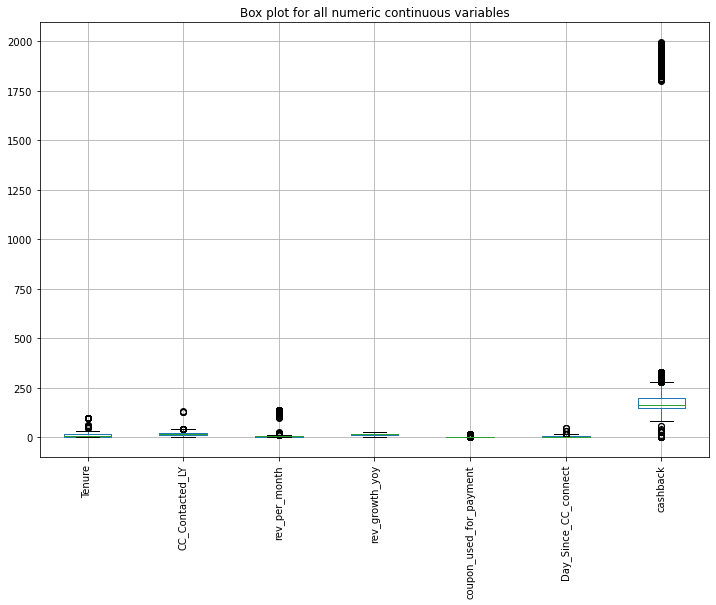

In [64]:
plt.figure(figsize=(12,8))
CC_predictor[num_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Box plot for all numeric continuous variables");

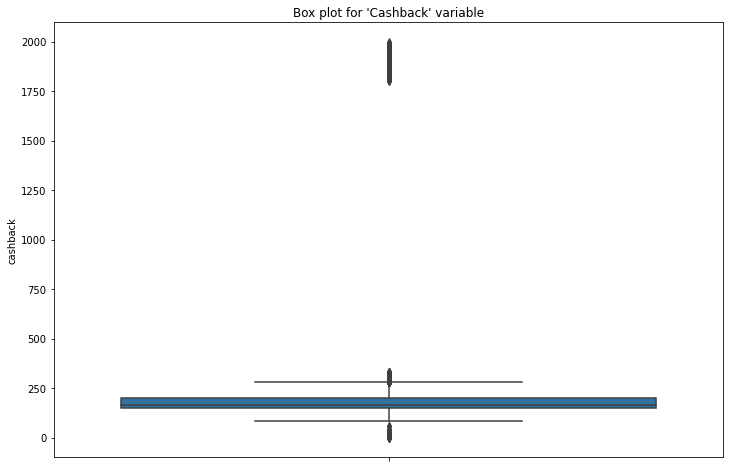

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(data=CC, y='cashback')
plt.xticks(rotation=90)
plt.title("Box plot for 'Cashback' variable");

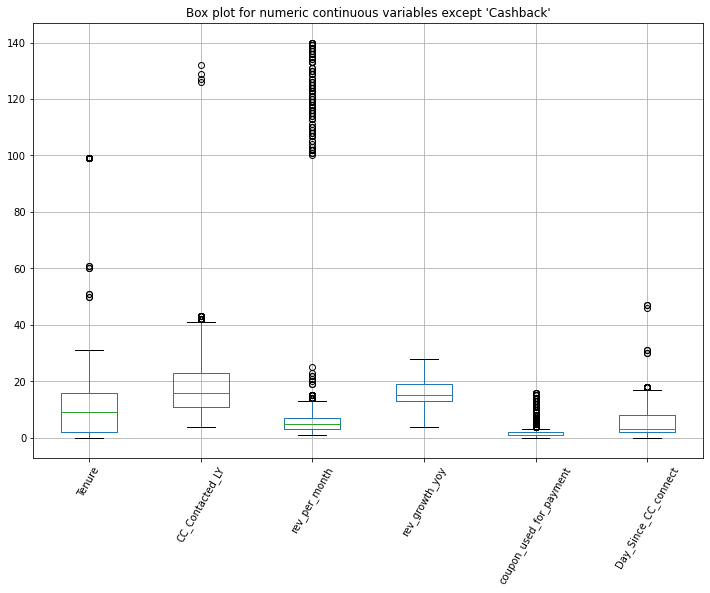

In [66]:
plt.figure(figsize=(12,8))
CC_predictor[num_cols].drop('cashback',axis=1).boxplot()
plt.xticks(rotation=60)
plt.title("Box plot for numeric continuous variables except 'Cashback'");

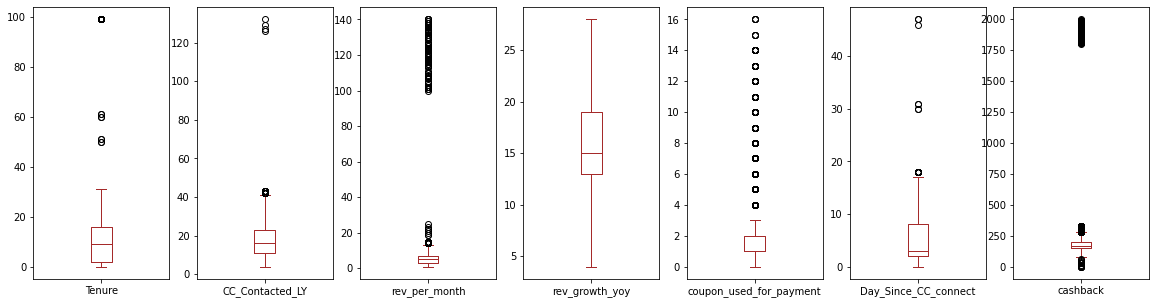

In [67]:
CC[num_cols].plot(kind = 'box', subplots = True,
       figsize = (20,5), color = 'brown');
#plt.title("Boxplot for numeric columns"); 

In [68]:
CC['coupon_used_for_payment'].value_counts()

1.0     4373
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
10.0      34
9.0       34
11.0      30
12.0      26
13.0      22
14.0      12
16.0       4
15.0       4
Name: coupon_used_for_payment, dtype: int64

<b> Observation </b> coupon_used_for_payment will not be outlier treated as it has only 16 distinct values.

In [69]:
Outlier_treat_vars = ['Tenure','CC_Contacted_LY','rev_per_month','Day_Since_CC_connect', 'cashback']

#### Histogram for continuous variables

In [70]:
## Using displot
#for i in num_cols:
#    plt.figure(figsize=(8,5))
#    sns.displot(data=CC, x=i)
#    plot_title = 'Histogram for ' + i
#    plt.title(plot_title)
#    plt.show();

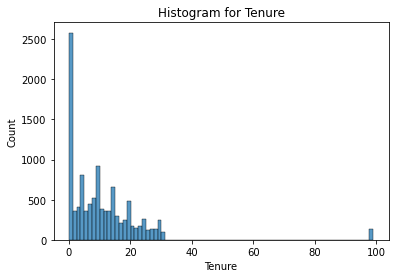

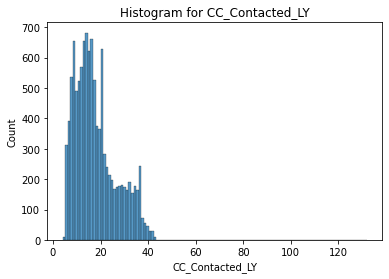

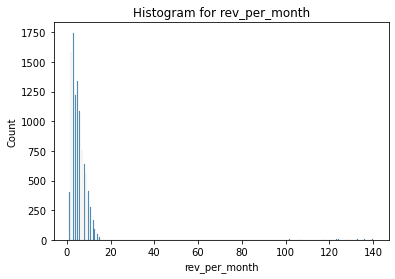

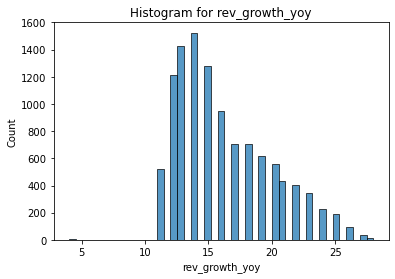

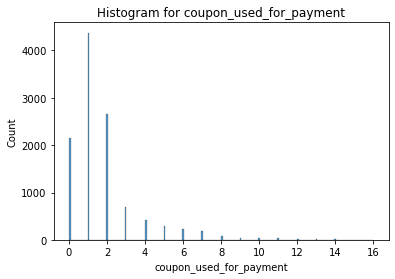

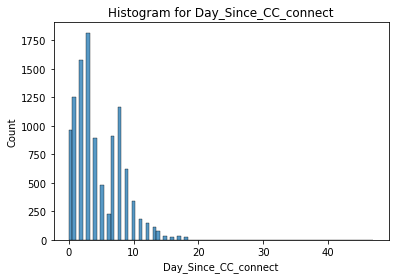

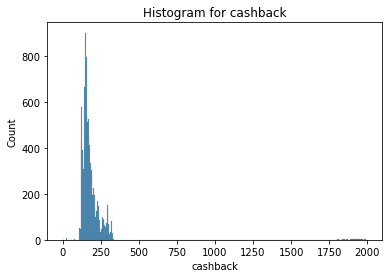

In [71]:
## Using histplot
for i in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=CC, x=i)
    plot_title = 'Histogram for ' + i
    plt.title(plot_title)
    plt.show();

In [72]:
cols = ['Skewness']
pd.DataFrame(CC[num_cols].skew(skipna=True).round(2), columns=cols)

,Skewness
Tenure,3.90
CC_Contacted_LY,1.42
rev_per_month,9.09
rev_growth_yoy,0.75
coupon_used_for_payment,2.58
Day_Since_CC_connect,1.27
cashback,8.77


### Univariate - Count plot for categorical variables

#### Target variable analysis

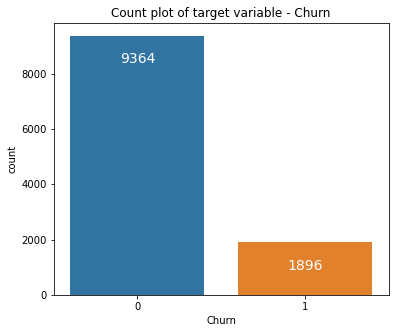

In [73]:
## Count plot of target column


plt.figure(figsize=(6,5))
ax = sns.countplot(x='Churn', data=CC)

## To display on top of the bar
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")
    
## To display inside the bar
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)
plt.title("Count plot of target variable - Churn");


In [74]:
## Checking for balance of target variable in the dataset

(CC['Churn'].value_counts(normalize=True).round(3)) * 100

0    83.2
1    16.8
Name: Churn, dtype: float64

<b> Observation: </b> This is an imbalanced dataset with target variable containing 16.8% churn. The prediction will be for minority class.

#### Other categorical variables

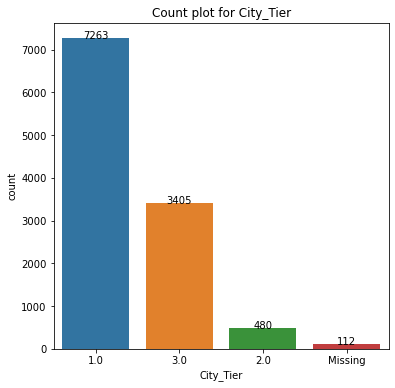

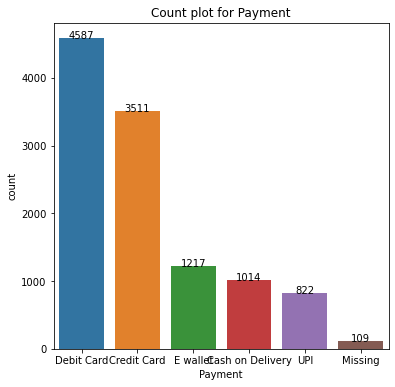

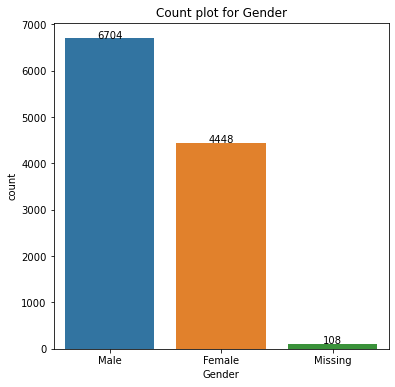

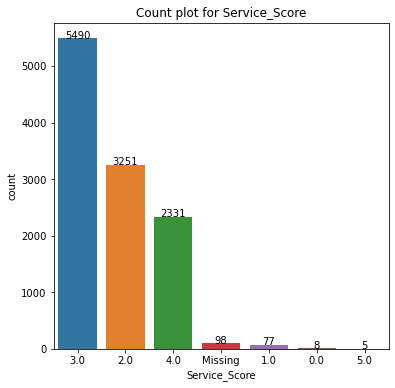

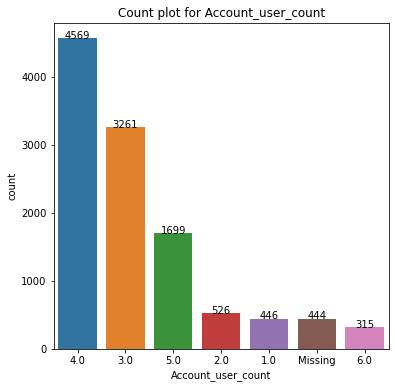

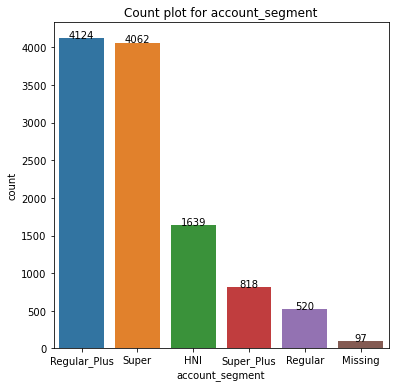

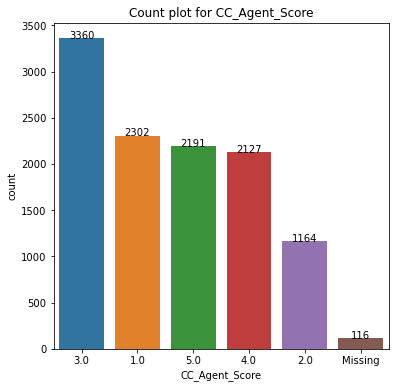

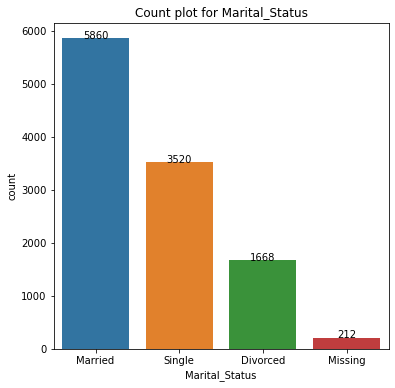

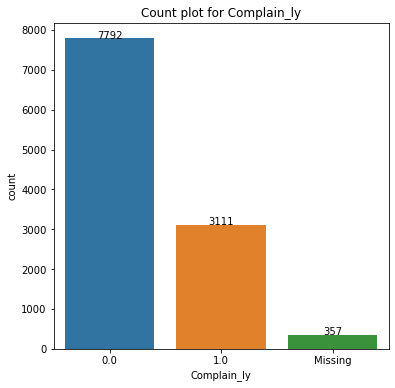

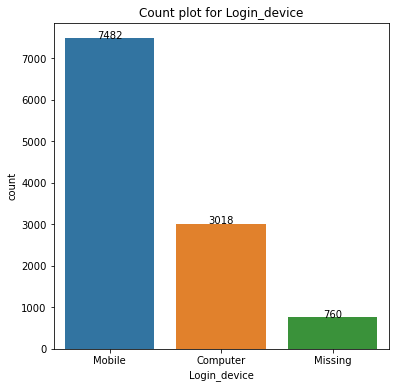

In [75]:
df = pd.DataFrame()
for i in cat_cols:
    plt.figure(figsize=(6,6))
    
    df[i] = CC[i].fillna("Missing")
    order = df[i].value_counts(ascending=False).index
    ax = sns.countplot(x=df[i],order=order)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height+1, height, ha="center")

    plot_title = 'Count plot for ' + i
    plt.title(plot_title)
    plt.show();

### Bivariate analysis - Numerical fields vs Churn 
#### Histogram and boxplots with hue

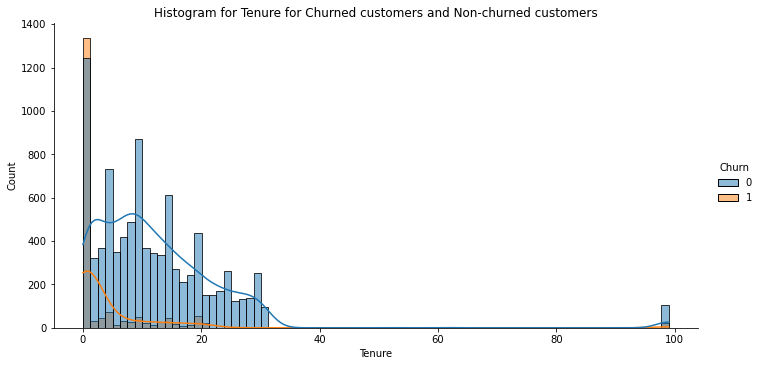

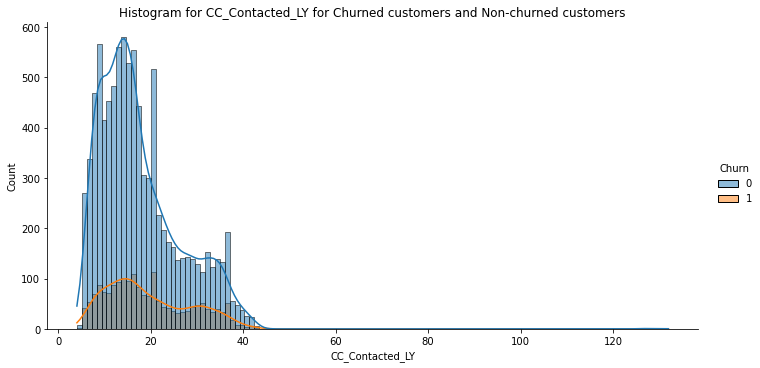

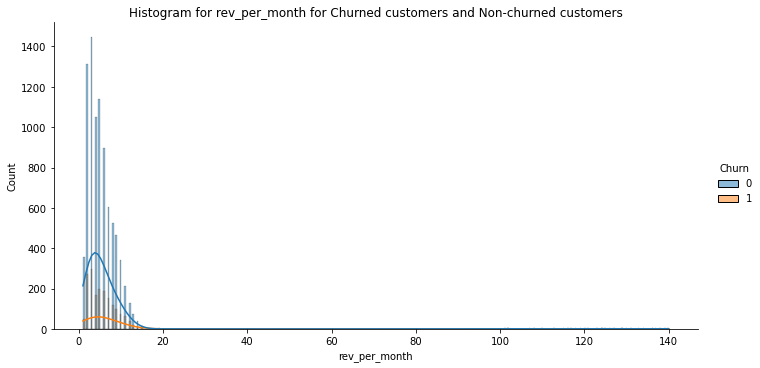

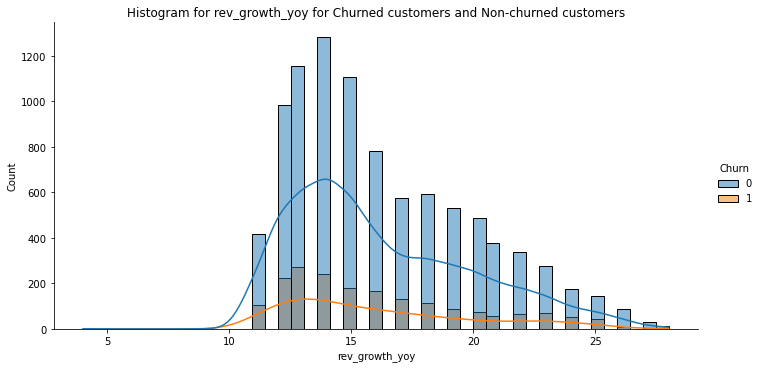

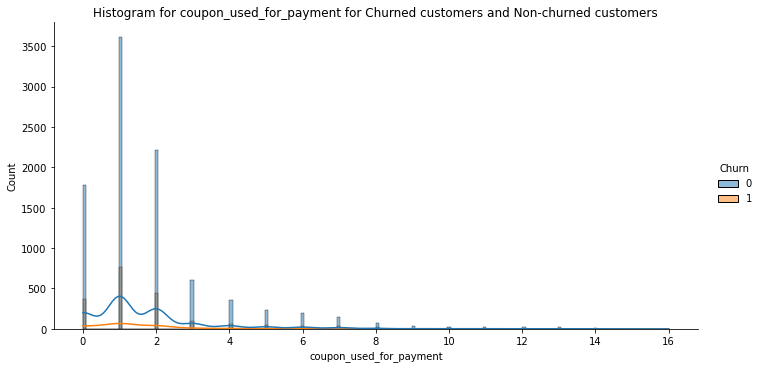

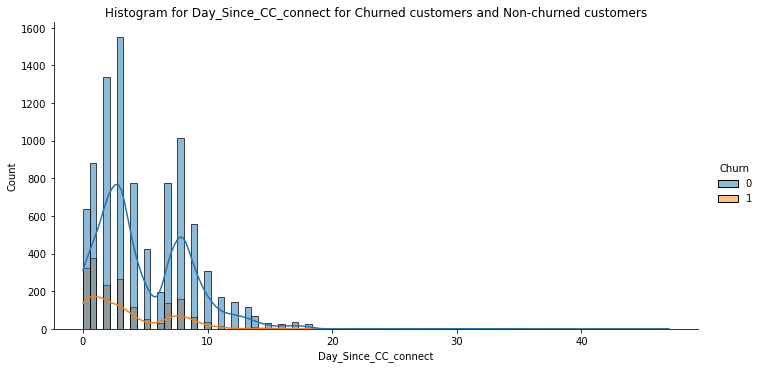

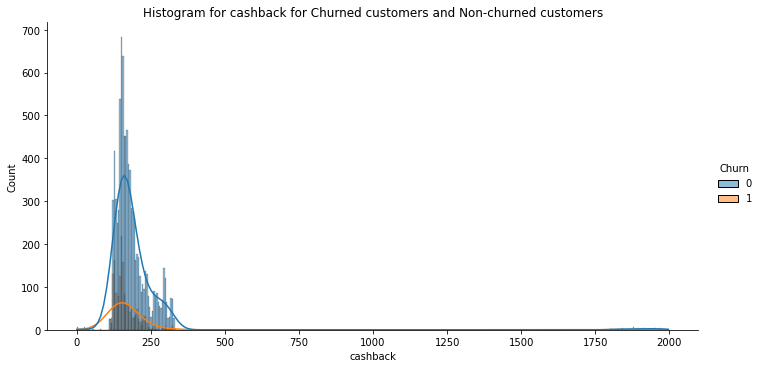

In [76]:
for i in num_cols:
    sns.displot(x=CC[i], hue=CC['Churn'], kind='hist', kde=True, aspect=2)
    plot_title = "Histogram for " + i + " for Churned customers and Non-churned customers"
    plt.title(plot_title)
    plt.show();

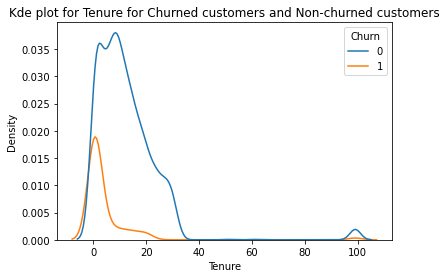

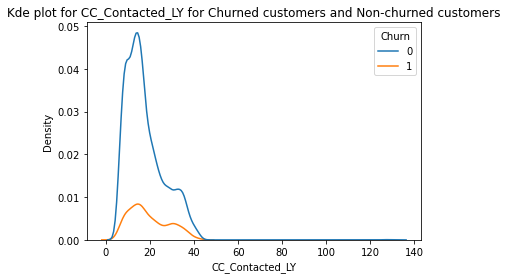

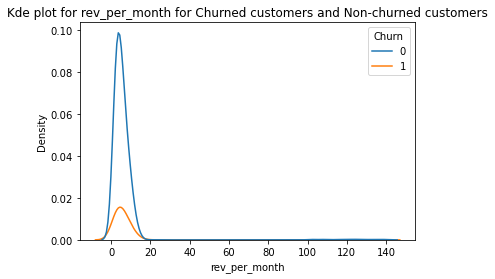

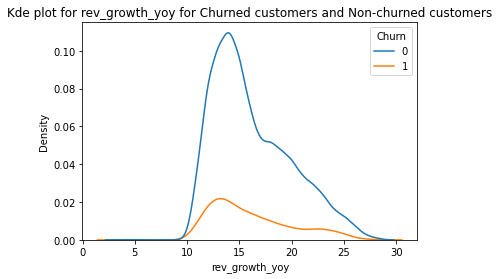

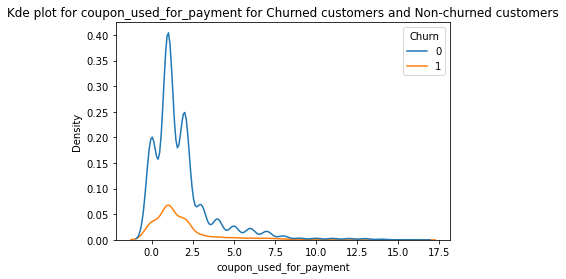

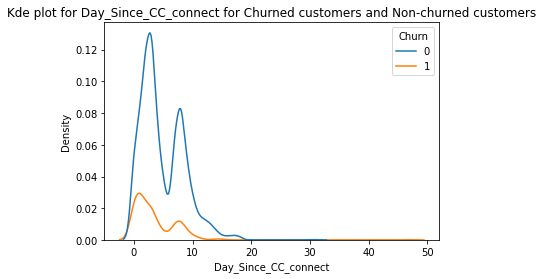

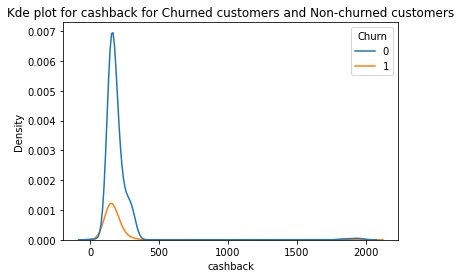

In [77]:
for i in num_cols:
    sns.kdeplot(x=CC[i], hue=CC['Churn'])
    plot_title = "Kde plot for " + i + " for Churned customers and Non-churned customers"
    plt.title(plot_title)
    plt.show();

In [78]:
##Box plot errors if 0 and 1s are left as-is or datatype converted as object/categorical. Hence converting to string
##Need to convert back after analysis
CC['Churn'] = CC['Churn'].replace( {1: 'Churned', 0: 'Current'} )

In [79]:
CC.Churn.value_counts(normalize=True)

Current    0.831616
Churned    0.168384
Name: Churn, dtype: float64

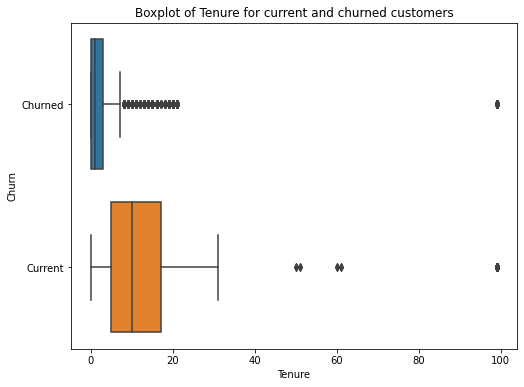

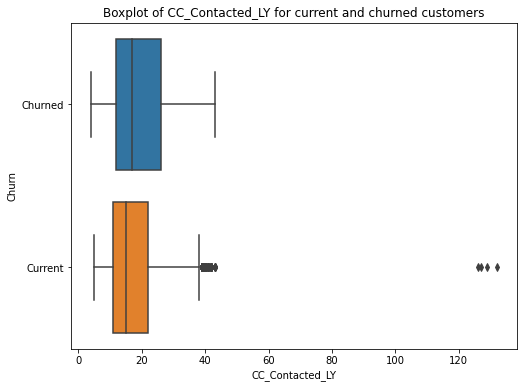

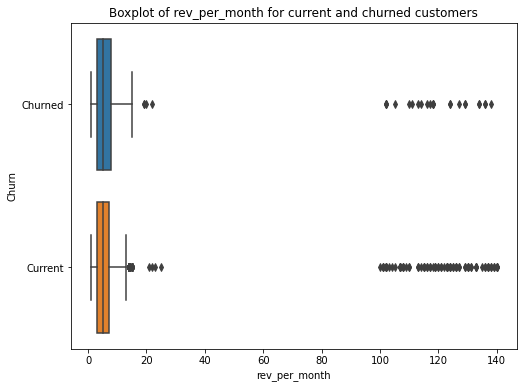

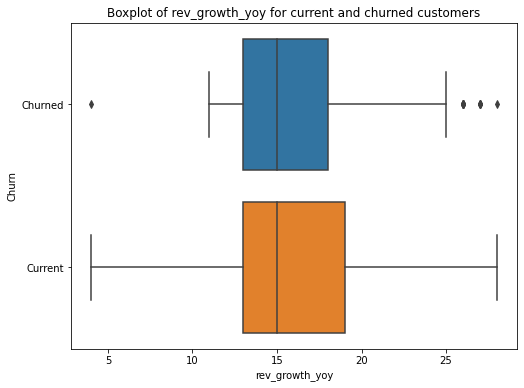

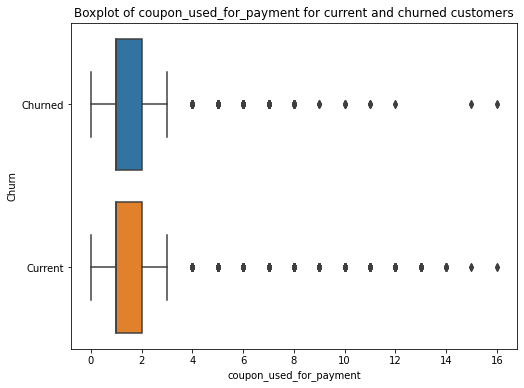

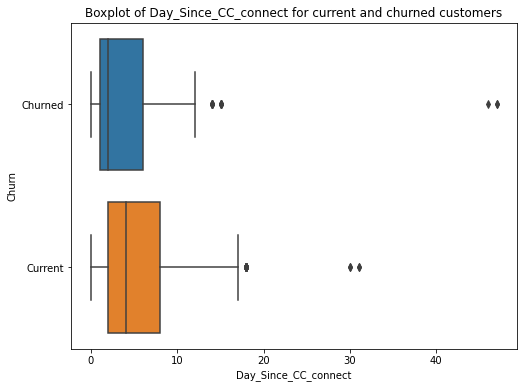

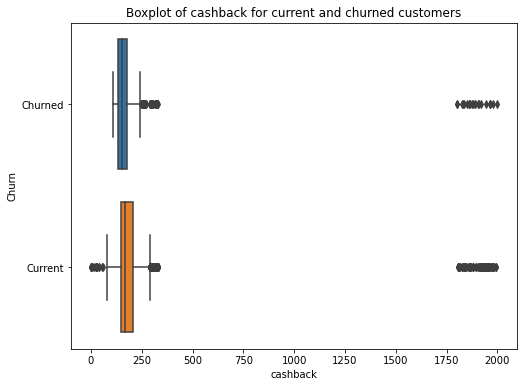

In [80]:
for i in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=CC[i], y=CC['Churn'])
    plot_title = 'Boxplot of ' + i + " for current and churned customers"
    plt.title(plot_title)
    plt.show();

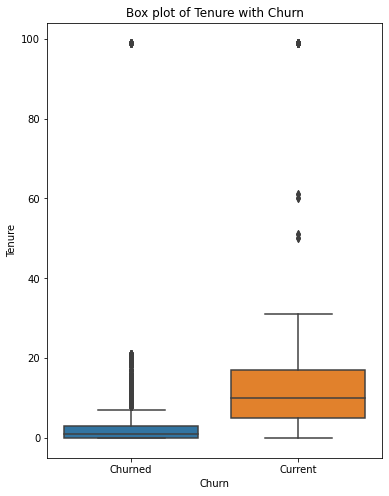

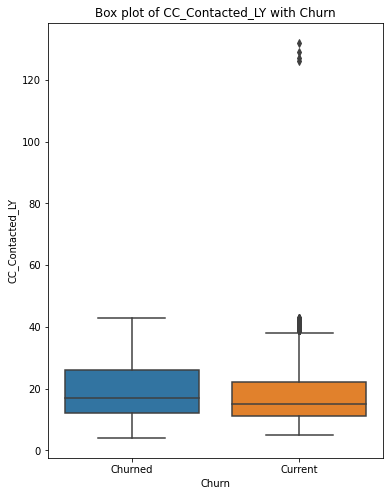

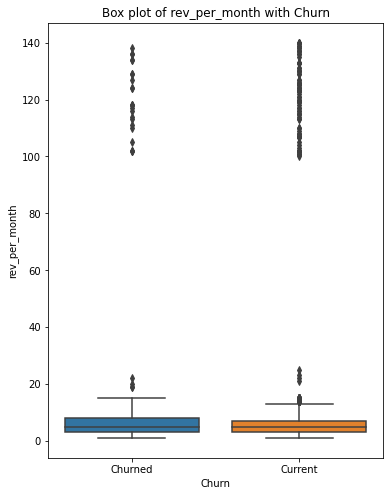

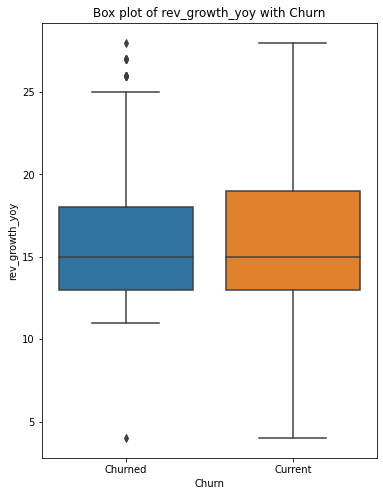

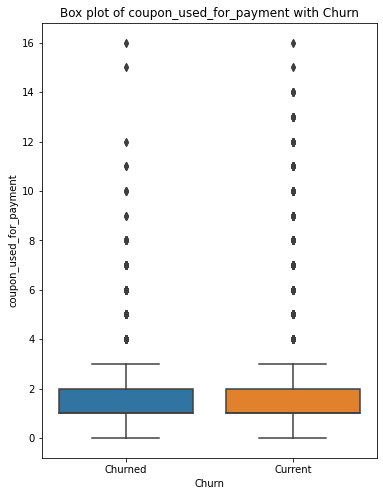

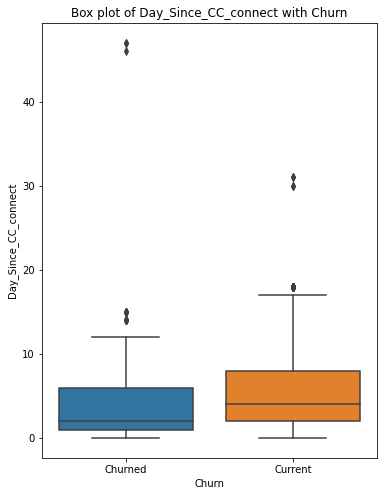

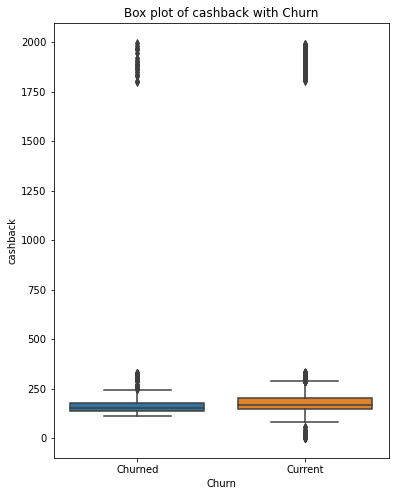

In [81]:
for i in num_cols:
    plt.figure(figsize=(6,8))
    sns.boxplot(data = CC, y=i, x='Churn')
    plot_title = "Box plot of "+i+" with Churn"
    plt.title(plot_title)
    plt.show();

In [82]:
#sns.displot(x=CC['rev_growth_yoy'], hue=CC['Churn'], kind='hist', kde=True);  

#### One-way Anova Hypothesis test for feature selection

$H_o : \mu_1 = \mu_2$    
Means for churn=0 and churn=1 observations with respect to the predictor variable are the same.

$H_a$ : Means for the churn=0 and churn=1 with respect to the predictor variable are not equal.

In [83]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [84]:
num_cols

['Tenure',
 'CC_Contacted_LY',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

In [85]:
## Anova for Churn vs Tenure

formula = 'Tenure ~ C(Churn)'
model = ols(formula,CC).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,9.956283e+04,99562.834286,634.621266,3.320121e-136
Residual,11040.0,1.732015e+06,156.885436,NaN,NaN


In [86]:
## Anova for Churn vs CC_Contacted_LY

formula = 'CC_Contacted_LY ~ C(Churn)'
model = ols(formula,CC).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,4542.363574,4542.363574,58.250189,2.496284e-14
Residual,11156.0,869947.532195,77.980238,NaN,NaN


In [87]:
## Anova for Churn vs rev_per_month

formula = 'rev_per_month ~ C(Churn)'
model = ols(formula,CC).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,7.542129e+02,754.212873,5.319521,0.021107
Residual,10467.0,1.484033e+06,141.782113,NaN,NaN


In [88]:
## Anova for Churn vs rev_growth_yoy

formula = 'rev_growth_yoy ~ C(Churn)'
model = ols(formula,CC).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,30.605488,30.605488,2.16768,0.140967
Residual,11255.0,158909.382786,14.119003,NaN,NaN


In [89]:
## Anova for Churn vs coupon_used_for_payment

formula = 'coupon_used_for_payment ~ C(Churn)'
model = ols(formula,CC).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,9.597780,9.597780,2.474533,0.115732
Residual,11255.0,43653.891604,3.878622,NaN,NaN


In [90]:
## Anova for Churn vs Day_Since_CC_connect

formula = 'Day_Since_CC_connect ~ C(Churn)'
model = ols(formula,CC).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,3262.738668,3262.738668,243.953328,2.097172e-54
Residual,10900.0,145781.374431,13.374438,NaN,NaN


In [91]:
## Anova for Churn vs cashback

formula = 'cashback ~ C(Churn)'
model = ols(formula,CC).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Churn),1.0,3.610195e+05,361019.455313,11.321105,0.000769
Residual,10785.0,3.439236e+08,31889.064508,NaN,NaN


<b> Observations </b> : coupon_used_for_payment and rev_growth_yoy have p-value > 0.05. This means that at a significance level of 5%, the null hypothesis can be rejected. Hence the means are not equal. Hence these two variables are significant to model building.

### Bivariate Analysis - Categorical vs Churn
#### Count plots and stacked bar

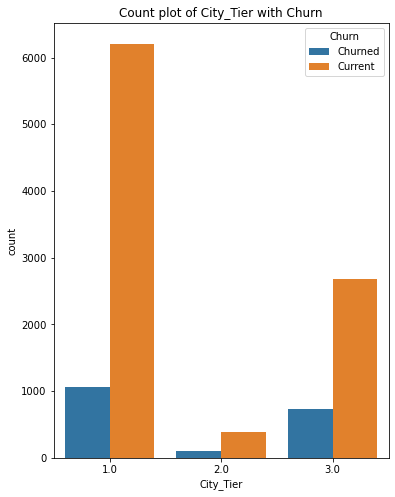

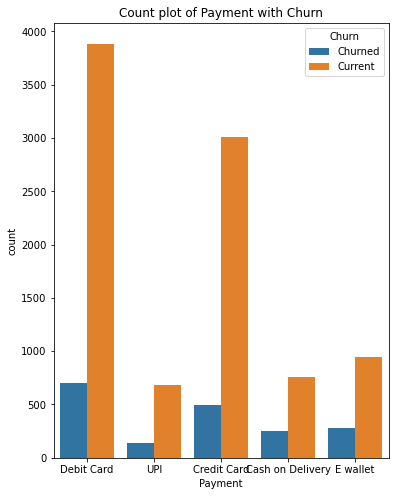

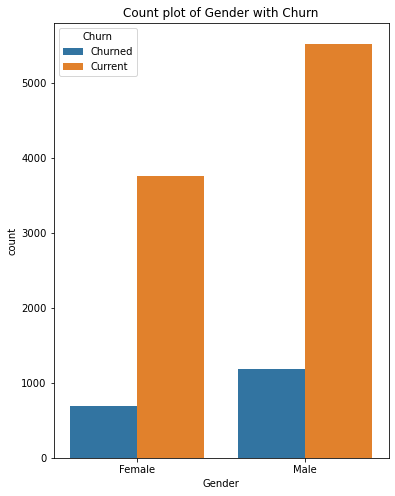

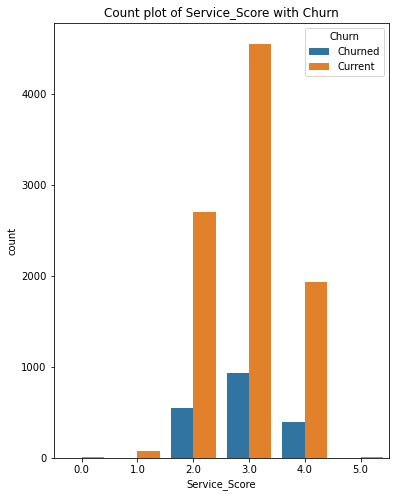

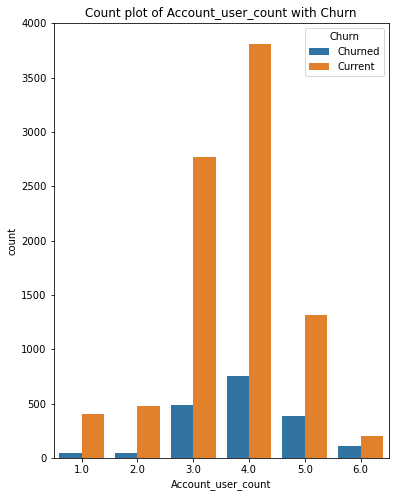

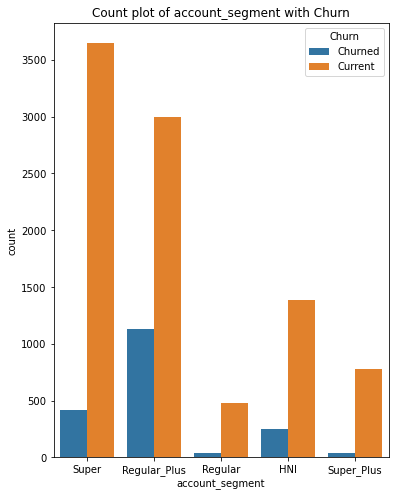

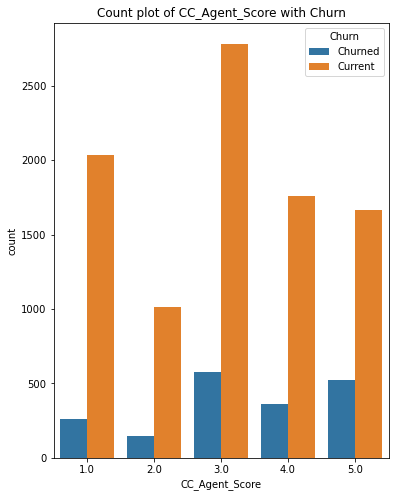

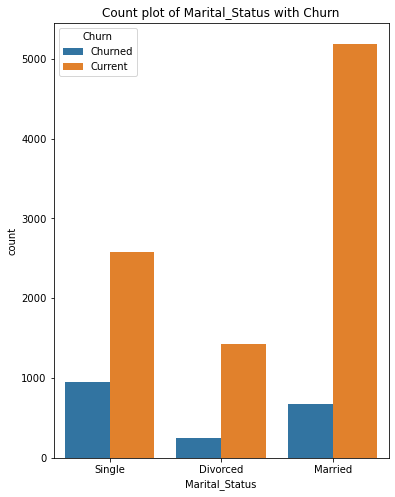

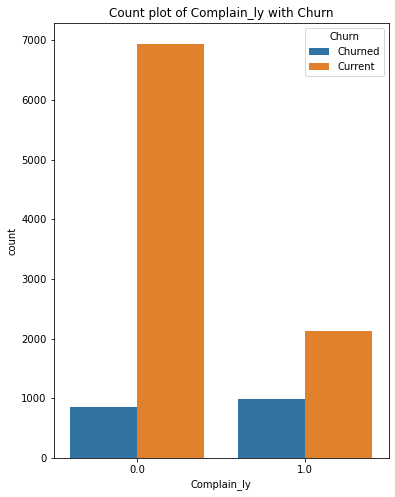

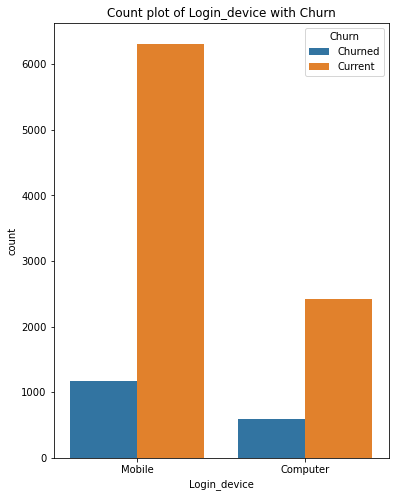

In [92]:
## Countplot with hue

for i in cat_cols:
    plt.figure(figsize=(6,8))
    sns.countplot(data = CC, x=i, hue='Churn')
    plot_title = "Count plot of "+i+" with Churn"
    plt.title(plot_title)
    plt.show();

In [93]:
pd.pivot_table(CC, values='AccountID', index=['Churn'], columns=['Login_device'], aggfunc='count', margins=True)

Login_device,Computer,Mobile,All
Churn,,,
Churned,597,1172,1769
Current,2421,6310,8731
All,3018,7482,10500


City_Tier       1.0       2.0       3.0
Churn                                  
Churned    0.562001  0.051091  0.386908
Current    0.669652  0.041428  0.288920


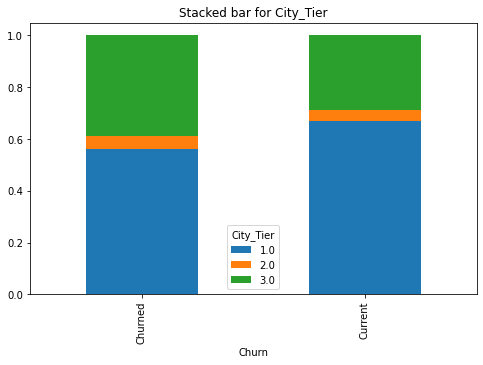

Payment  Cash on Delivery  Credit Card  Debit Card  E wallet       UPI
Churn                                                                 
Churned          0.135539     0.266275    0.374600  0.147279  0.076307
Current          0.081923     0.324674    0.418778  0.101434  0.073192


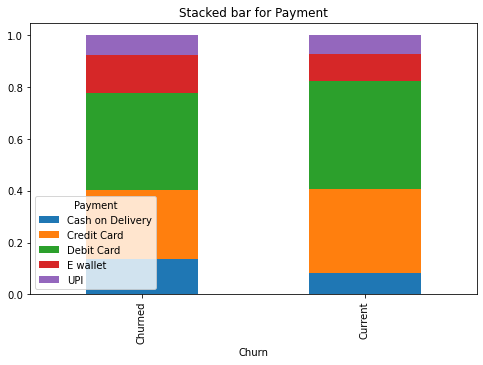

Gender     Female      Male
Churn                      
Churned  0.367663  0.632337
Current  0.405152  0.594848


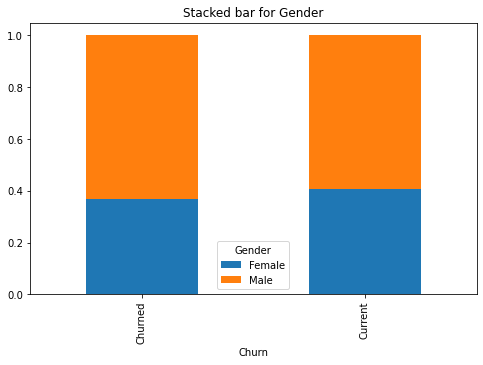

Service_Score       0.0       1.0       2.0       3.0       4.0       5.0
Churn                                                                    
Churned        0.000000  0.000000  0.292553  0.497872  0.209574  0.000000
Current        0.000862  0.008296  0.290993  0.490627  0.208683  0.000539


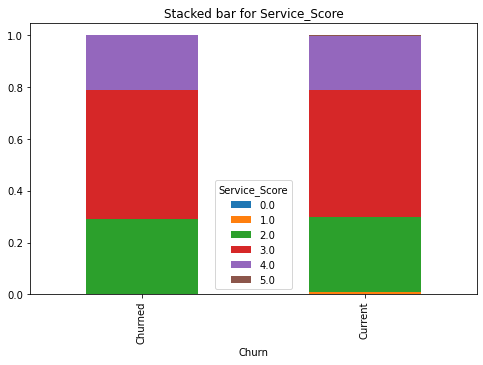

Account_user_count       1.0       2.0       3.0       4.0       5.0       6.0
Churn                                                                         
Churned             0.024044  0.026230  0.267213  0.414208  0.208743  0.059563
Current             0.044736  0.053194  0.308480  0.424104  0.146561  0.022925


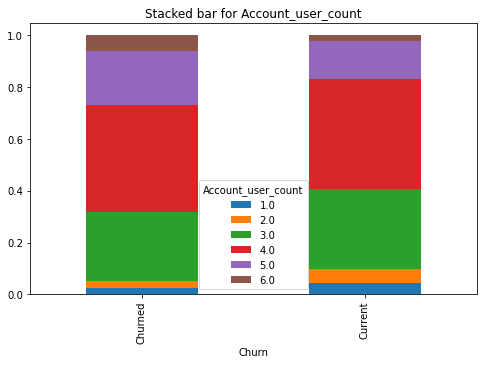

account_segment       HNI   Regular  Regular_Plus     Super  Super_Plus
Churn                                                                  
Churned          0.135783  0.021299      0.600106  0.221512    0.021299
Current          0.149058  0.051696      0.322779  0.392676    0.083791


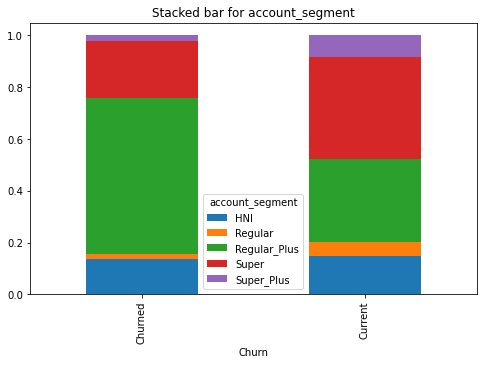

CC_Agent_Score       1.0       2.0       3.0       4.0       5.0
Churn                                                           
Churned         0.140875  0.078442  0.307898  0.194237  0.278549
Current         0.219849  0.109709  0.300216  0.190183  0.180043


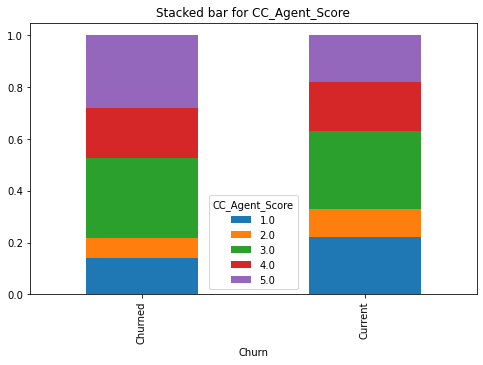

Marital_Status  Divorced   Married    Single
Churn                                       
Churned         0.130901  0.361052  0.508047
Current         0.155052  0.564787  0.280161


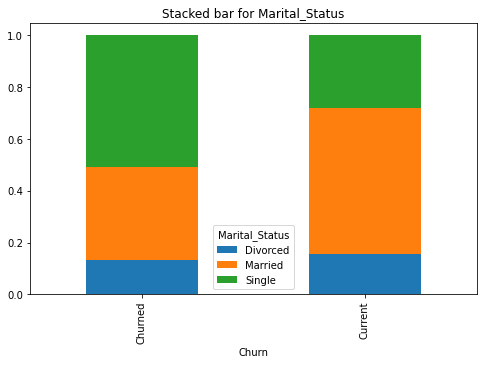

Complain_ly       0.0       1.0
Churn                          
Churned      0.462459  0.537541
Current      0.765803  0.234197


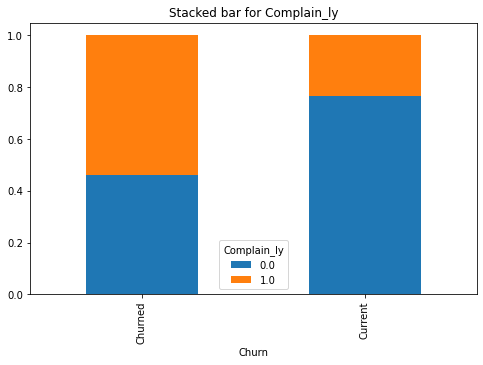

Login_device  Computer    Mobile
Churn                           
Churned       0.337479  0.662521
Current       0.277288  0.722712


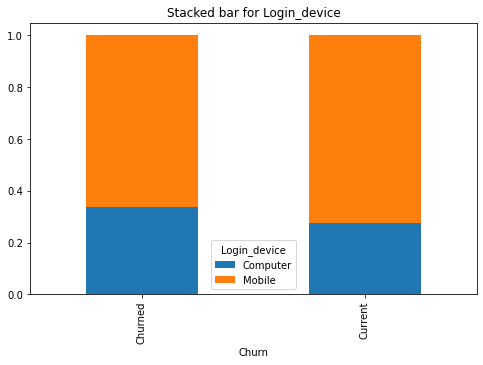

In [94]:
for i in cat_cols:
    tab = pd.crosstab(CC['Churn'],CC[i],normalize='index')
    print(tab)
    #plt.figure(figsize=(12,6))
    tab.plot(kind='bar', stacked = True, figsize=(8,5))
    plot_title = "Stacked bar for " + i
    plt.title(plot_title)
    plt.show();


<b> Observations </b> Here we are looking at disproportionate differences in churn with respect to different categorical variables. 
- for e.g., Complaints last year - greater proportion of customers who complained last year churned compared to proportion of churn from the non-complaint group.
- Similarly single customers have a greater proportion of churn compared to married customers.
- A greater proportion of Regular Plus customers churned compared to Super customers.
- A greater proportion of Tier 3 customers churned in comparison to Tier 1 customers.

#### Chi squared test for independence - feature selection

<b> Hypothesis :</b>
- Null hypothesis: There is no relationship between two categorical variables
- Alternate hypothesis: There is a relationship between two categorical variables

<b> Questions to be answered through this test </b>
- Does Churn have any relationship with any of the categorical variables

#### Chi2 test for Gender and Churn

In [95]:
gender_churn_ct = pd.crosstab(index = CC['Gender'], columns = CC['Churn'])
gender_churn_ct

Churn,Churned,Current
Gender,,
Female,689,3759
Male,1185,5519


In [96]:
gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values

(array([ 689, 3759], dtype=int64), array([1185, 5519], dtype=int64))

In [97]:
from scipy import stats

In [98]:
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [99]:
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   8.983145746725429
p-value    :   0.0027248115020348197
degree of freedom    :   1


In [100]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [101]:
op_table = pd.DataFrame(columns=['Variable','chi2','p-value','chi2_output'])

In [102]:
op_table

,Variable,chi2,p-value,chi2_output


In [103]:
dict = {'Variable':'Gender', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,0.002725,Reject Ho; Dependent.


#### Chi2 test for Service_Score

In [104]:
variable = 'Service_Score'

In [105]:
variable_churn_ct = pd.crosstab(index = CC[variable], columns = CC['Churn'])
variable_churn_ct

Churn,Churned,Current
Service_Score,,
0.0,0,8
1.0,0,77
2.0,550,2701
3.0,936,4554
4.0,394,1937
5.0,0,5


In [106]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values, variable_churn_ct.iloc[5].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   18.41468968297087
p-value    :   0.002469165780736688
degree of freedom    :   5
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,0.002725,Reject Ho; Dependent.
1,Service_Score,18.414690,0.002469,Reject Ho; Dependent.


#### Chi2 test for City_Tier

In [107]:
variable = 'City_Tier'
variable_churn_ct = pd.crosstab(index = CC[variable], columns = CC['Churn'])
variable_churn_ct

Churn,Churned,Current
City_Tier,,
1.0,1056,6207
2.0,96,384
3.0,727,2678


In [108]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   80.28881725426068
p-value    :   3.677095031246197e-18
degree of freedom    :   2
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.


#### Chi2 test for Payment

In [109]:
variable = 'Payment'
variable_churn_ct = pd.crosstab(index = CC[variable], columns = CC['Churn'])
variable_churn_ct

Churn,Churned,Current
Payment,,
Cash on Delivery,254,760
Credit Card,499,3012
Debit Card,702,3885
E wallet,276,941
UPI,143,679


In [110]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   103.7996168922195
p-value    :   1.526348412908852e-21
degree of freedom    :   4
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.


#### Chi2 test for Account_user_count

In [111]:
variable = 'Account_user_count'
variable_churn_ct = pd.crosstab(index = CC[variable], columns = CC['Churn'])
variable_churn_ct

Churn,Churned,Current
Account_user_count,,
1.0,44,402
2.0,48,478
3.0,489,2772
4.0,758,3811
5.0,382,1317
6.0,109,206


In [112]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values, variable_churn_ct.iloc[5].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   154.95944512866276
p-value    :   1.1735736543478535e-31
degree of freedom    :   5
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.


#### Chi2 test for account_segment

In [113]:
variable = 'account_segment'
variable_churn_ct = pd.crosstab(index = CC[variable], columns = CC['Churn'])
variable_churn_ct

Churn,Churned,Current
account_segment,,
HNI,255,1384
Regular,40,480
Regular_Plus,1127,2997
Super,416,3646
Super_Plus,40,778


In [114]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   567.0684021977117
p-value    :   2.073936753745742e-121
degree of freedom    :   4
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.


#### Chi2 test for CC_Agent_Score

In [115]:
variable = 'CC_Agent_Score'
variable_churn_ct = pd.crosstab(index = CC[variable], columns = CC['Churn'])
variable_churn_ct

Churn,Churned,Current
CC_Agent_Score,,
1.0,264,2038
2.0,147,1017
3.0,577,2783
4.0,364,1763
5.0,522,1669


In [116]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values, variable_churn_ct.iloc[3].values, variable_churn_ct.iloc[4].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   139.03156455862975
p-value    :   4.54952105322674e-29
degree of freedom    :   4
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.
6,CC_Agent_Score,139.031565,4.549521e-29,Reject Ho; Dependent.


#### Chi2 test for Marital_Status

In [117]:
variable = 'Marital_Status'
variable_churn_ct = pd.crosstab(index = CC[variable], columns = CC['Churn'])
variable_churn_ct

Churn,Churned,Current
Marital_Status,,
Divorced,244,1424
Married,673,5187
Single,947,2573


In [118]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values, variable_churn_ct.iloc[2].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   379.8081234819416
p-value    :   3.355165093920422e-83
degree of freedom    :   2
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.
6,CC_Agent_Score,139.031565,4.549521e-29,Reject Ho; Dependent.
7,Marital_Status,379.808123,3.355165e-83,Reject Ho; Dependent.


#### Chi2 test for Complain_ly

In [119]:
variable = 'Complain_ly'
variable_churn_ct = pd.crosstab(index = CC[variable], columns = CC['Churn'])
variable_churn_ct

Churn,Churned,Current
Complain_ly,,
0.0,850,6942
1.0,988,2123


In [120]:
(chi2, p, dof, _) = stats.chi2_contingency([variable_churn_ct.iloc[0].values, variable_churn_ct.iloc[1].values])

if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)
print("chi2_output : ", chi2_decision)

dict = {'Variable':variable, 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

chi2     :   688.0847388901824
p-value    :   1.1662391608576007e-151
degree of freedom    :   1
chi2_output :  Reject Ho; Dependent.


,Variable,chi2,p-value,chi2_output
0,Gender,8.983146,2.724812e-03,Reject Ho; Dependent.
1,Service_Score,18.414690,2.469166e-03,Reject Ho; Dependent.
2,City_Tier,80.288817,3.677095e-18,Reject Ho; Dependent.
3,Payment,103.799617,1.526348e-21,Reject Ho; Dependent.
4,Account_user_count,154.959445,1.173574e-31,Reject Ho; Dependent.
5,account_segment,567.068402,2.073937e-121,Reject Ho; Dependent.
6,CC_Agent_Score,139.031565,4.549521e-29,Reject Ho; Dependent.
7,Marital_Status,379.808123,3.355165e-83,Reject Ho; Dependent.
8,Complain_ly,688.084739,1.166239e-151,Reject Ho; Dependent.


#### Pairplot

In [121]:
pair = CC[num_cols]

In [122]:
pair['Churn'] = CC['Churn']

<ipython-input-122-96f5c1c3eca0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair['Churn'] = CC['Churn']


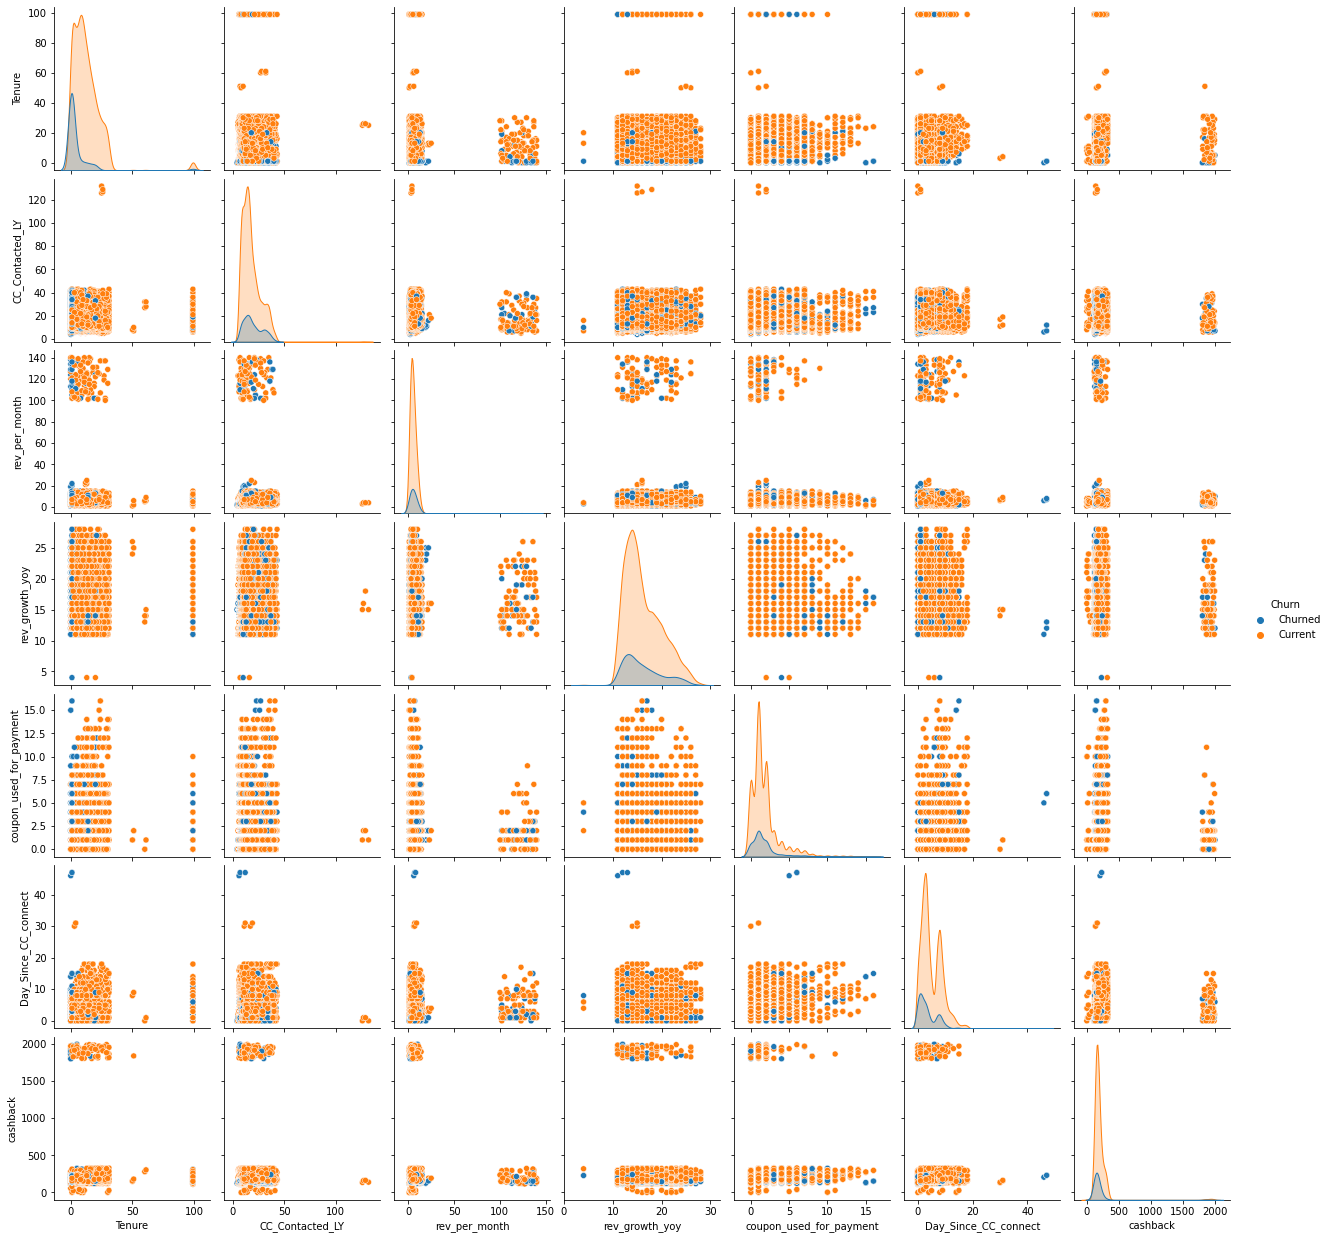

In [123]:
sns.pairplot(data=pair, hue='Churn');

#### Correlation Matrix

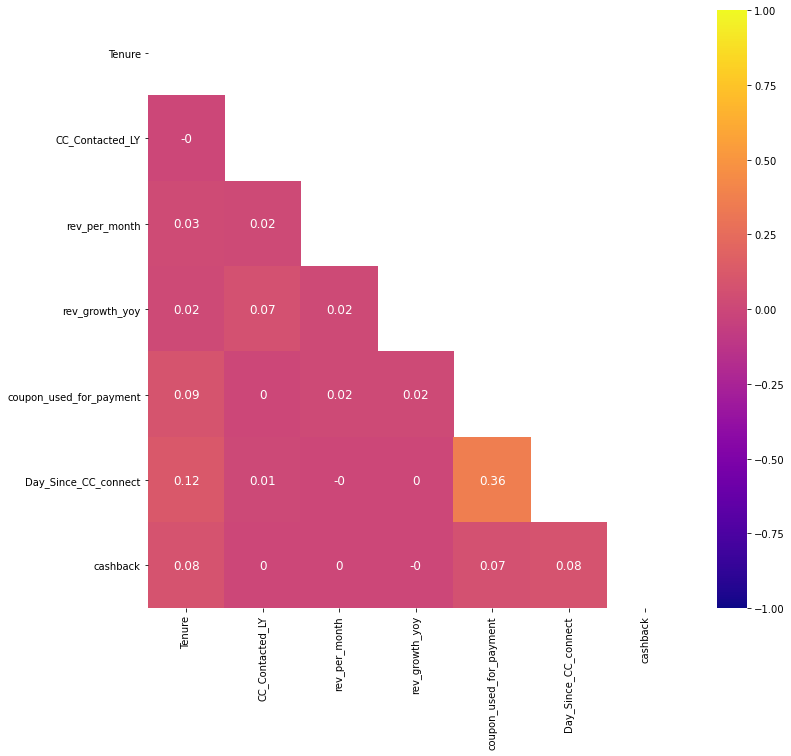

In [124]:
CC_num = CC[num_cols]
corr = CC_num.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool))

plt.figure(figsize = (12,11))
sns.heatmap(round(corr,2), annot=True, mask=mask, cmap='plasma', vmin=-1, vmax=1, annot_kws={'size':12});

<b> Observations </b>: The continuous numeric variables do not show strong correlations with each other.

#### Replacing 0s and 1s in Target column 'Churn'

In [125]:
CC['Churn'] = CC['Churn'].replace( {'Churned': 1, 'Current': 0} )

In [126]:
CC['Churn'].dtypes

dtype('int64')

### Removal of unwanted variables - Dropping AccountID

In [127]:
CC.drop(["AccountID","rev_growth_yoy", "coupon_used_for_payment"], axis=1, inplace=True)

In [128]:
CC.shape

(11260, 16)

## One hot/dummy encoding

In [129]:
OneHotCols = ['Payment','Gender','account_segment','Marital_Status','Login_device']

In [130]:
CC = pd.get_dummies(CC, columns=OneHotCols, drop_first=True) ### mass dummy encoding
CC.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,Day_Since_CC_connect,...,Payment_E wallet,Payment_UPI,Gender_Male,account_segment_Regular,account_segment_Regular_Plus,account_segment_Super,account_segment_Super_Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,...,0,0,0,0,0,1,0,0,1,1
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,...,0,1,1,0,1,0,0,0,1,1
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,...,0,0,1,0,1,0,0,0,1,1
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,...,0,0,1,0,0,1,0,0,1,1
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,...,0,0,1,0,1,0,0,0,1,1


In [131]:
CC.shape

(11260, 23)

In [132]:
## Got to check if column names are ok after one hot encoding
CC.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'Day_Since_CC_connect', 'cashback', 'Payment_Credit Card',
       'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI', 'Gender_Male',
       'account_segment_Regular', 'account_segment_Regular_Plus',
       'account_segment_Super', 'account_segment_Super_Plus',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Login_device_Mobile'],
      dtype='object')

In [133]:
## Blanks in 'Credit card', 'E wallet' and 'Debit card' to be removed; Super Plus and Regular Plus also shortened

CC.columns = ['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'User_Count', 'CC_Score', 'Rev_Permonth', 'Complain_LY',
       'Days_Since_CC', 'Cashback', 'Payment_Creditcard',
       'Payment_Debitcard', 'Payment_Ewallet', 'Payment_UPI', 'Gender_Male',
       'ACSegment_Regular', 'ACSegment_Regularplus',
       'ACSegment_Super', 'ACSegment_Superplus',
       'Maritalstatus_Married', 'Maritalstatus_Single',
       'Logindevice_Mobile']

In [134]:
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  11260 non-null  int64  
 1   Tenure                 11042 non-null  float64
 2   City_Tier              11148 non-null  float64
 3   CC_Contacted_LY        11158 non-null  float64
 4   Service_Score          11162 non-null  float64
 5   User_Count             10816 non-null  float64
 6   CC_Score               11144 non-null  float64
 7   Rev_Permonth           10469 non-null  float64
 8   Complain_LY            10903 non-null  float64
 9   Days_Since_CC          10902 non-null  float64
 10  Cashback               10787 non-null  float64
 11  Payment_Creditcard     11260 non-null  uint8  
 12  Payment_Debitcard      11260 non-null  uint8  
 13  Payment_Ewallet        11260 non-null  uint8  
 14  Payment_UPI            11260 non-null  uint8  
 15  Ge

## Missing value treatment

In [135]:
X = CC.drop('Churn', axis=1)
y = CC['Churn']

X.shape, y.shape

((11260, 22), (11260,))

### Scaling before KNN imputing

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [137]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,11042.0,-1.963025e-16,1.000045,-0.856038,-0.700749,-0.157237,0.386275,6.830775
City_Tier,11148.0,4.773919e-16,1.000045,-0.714697,-0.714697,-0.714697,1.471157,1.471157
CC_Contacted_LY,11158.0,1.645236e-15,1.000045,-1.566394,-0.775691,-0.210902,0.579802,12.892189
Service_Score,11162.0,4.623161e-15,1.000045,-4.000444,-1.243919,0.134344,0.134344,2.890870
User_Count,10816.0,7.944520e-15,1.000046,-2.632502,-0.677332,0.300253,0.300253,2.255423
CC_Score,11144.0,4.187415e-16,1.000045,-1.497773,-0.772983,-0.048194,0.676596,1.401386
Rev_Permonth,10469.0,-1.815649e-15,1.000048,-0.450293,-0.282355,-0.114416,0.053522,11.221437
Complain_LY,10903.0,-5.303166e-17,1.000046,-0.631867,-0.631867,-0.631867,1.582612,1.582612
Days_Since_CC,10902.0,1.741763e-16,1.000046,-1.253070,-0.712160,-0.441704,0.910573,11.458334
Cashback,10787.0,3.458061e-17,1.000046,-1.098427,-0.274423,-0.173445,0.021123,10.079715


### KNN imputing

In [138]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)


In [139]:
X.isnull().sum()

Tenure                   0
City_Tier                0
CC_Contacted_LY          0
Service_Score            0
User_Count               0
CC_Score                 0
Rev_Permonth             0
Complain_LY              0
Days_Since_CC            0
Cashback                 0
Payment_Creditcard       0
Payment_Debitcard        0
Payment_Ewallet          0
Payment_UPI              0
Gender_Male              0
ACSegment_Regular        0
ACSegment_Regularplus    0
ACSegment_Super          0
ACSegment_Superplus      0
Maritalstatus_Married    0
Maritalstatus_Single     0
Logindevice_Mobile       0
dtype: int64

<b> Observations </b> : All the null values have now been treated using KNN imputer.

In [140]:
## Inverse transforming X so that the dataset is reversed to its old values (reverse of scaling). This is done for two reasons:
## 1) Coefficients for logistic regression can be interpreted : Odds ratio of that variable = e power coefficient
## Reference: https://quantifyinghealth.com/interpret-logistic-regression-coefficients/
## 2) Train dataset and test dataset can be scaled separately for distance based algorithms where it is required

X_inverse_with_outlier = pd.DataFrame(scaler.inverse_transform(X), columns=X.columns)

In [141]:
X_inverse_with_outlier.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,Cashback,...,Payment_Ewallet,Payment_UPI,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,159.930,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,120.900,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,126.272,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,134.070,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,129.600,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [142]:
## Writing the null treated dataset separately for models that are outlier resistant

CC_with_outlier = pd.concat([round(X_inverse_with_outlier,0),y], axis=1)
CC_with_outlier.to_csv("CC_with_outlier.csv")

## Outlier treatment

In [143]:
Outlier_treat_vars = ['Tenure','CC_Contacted_LY','Rev_Permonth','Days_Since_CC','Cashback']

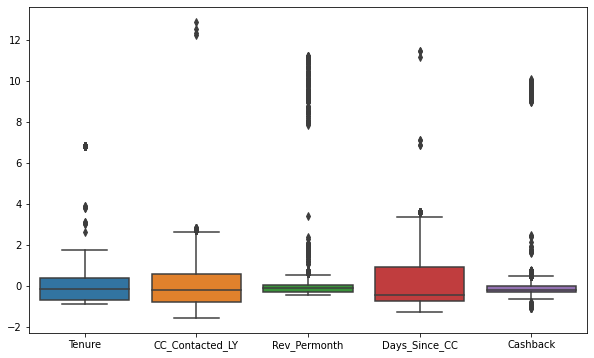

In [144]:
plt.figure(figsize=(10,6))
sns.boxplot(data = X[Outlier_treat_vars]);

Here, outliers will be treated by capping to the lower and upper range where 
- lower_range= Q1-(1.5 * IQR) and
- upper_range= Q3+(1.5 * IQR)

***Creating a user defined function for finding the lower and upper range for a variable so that outlier can be treated.***

In [145]:
def out_limit(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [146]:
for column in Outlier_treat_vars:
    lr,ur = out_limit(X[column])
    X[column] = np.where(X[column] > ur, ur, X[column])
    X[column] = np.where(X[column] < lr, lr, X[column])

**The outliers have now been treated with lower and upper range. Plotting box plot after outlier treatment**

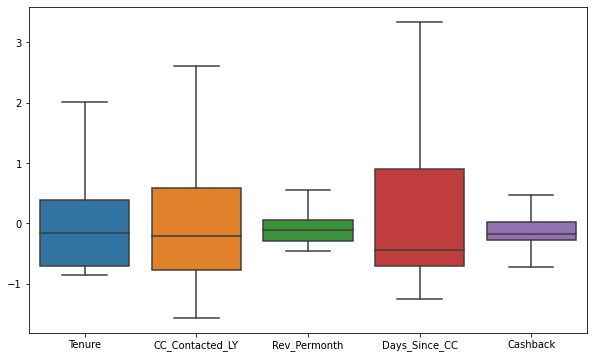

In [147]:
plt.figure(figsize=(10,6))
sns.boxplot(data = X[Outlier_treat_vars]);

**Observation: The boxplots show that outliers have been removed**

In [148]:
num_cols = ['Tenure', 'CC_Contacted_LY', 'Rev_Permonth', 'Complain_LY', 'Days_Since_CC', 'Cashback']
cols = ['Skewness']
pd.DataFrame(X[num_cols].skew().round(2), columns=cols)

,Skewness
Tenure,0.80
CC_Contacted_LY,0.80
Rev_Permonth,0.78
Complain_LY,0.95
Days_Since_CC,0.82
Cashback,0.93


In [149]:
## Inverse transforming X so that the dataset is reversed to its old values (reverse of scaling). This is done for two reasons:
## 1) Coefficients for logistic regression can be interpreted : Odds ratio of that variable = e power coefficient
## Reference: https://quantifyinghealth.com/interpret-logistic-regression-coefficients/
## 2) Train dataset and test dataset can be scaled separately for distance based algorithms where it is required

X_inverse_without_outlier = pd.DataFrame(scaler.inverse_transform(X), columns=X.columns)

In [150]:
X_inverse_without_outlier.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'User_Count',
       'CC_Score', 'Rev_Permonth', 'Complain_LY', 'Days_Since_CC', 'Cashback',
       'Payment_Creditcard', 'Payment_Debitcard', 'Payment_Ewallet',
       'Payment_UPI', 'Gender_Male', 'ACSegment_Regular',
       'ACSegment_Regularplus', 'ACSegment_Super', 'ACSegment_Superplus',
       'Maritalstatus_Married', 'Maritalstatus_Single', 'Logindevice_Mobile'],
      dtype='object')

In [151]:
df_total = pd.concat([round(X_inverse_without_outlier,0),y],axis=1)

In [152]:
df_total.to_csv('CC_without_outlier.csv', index=False) ## Saving the file to disk for modeling so that all the preprocess need not be repeated

## Bivariate graphs after outlier & missing value treatment

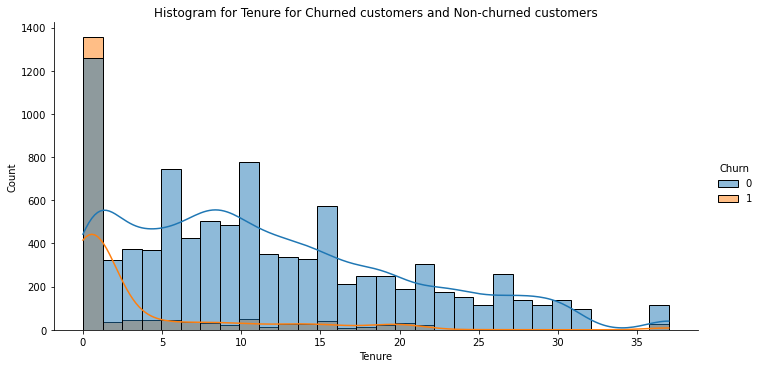

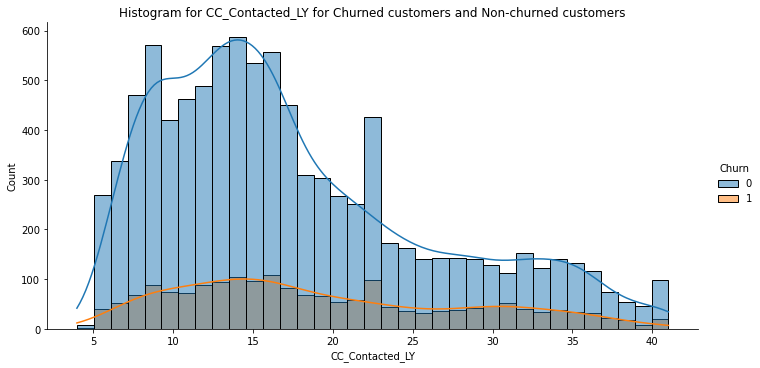

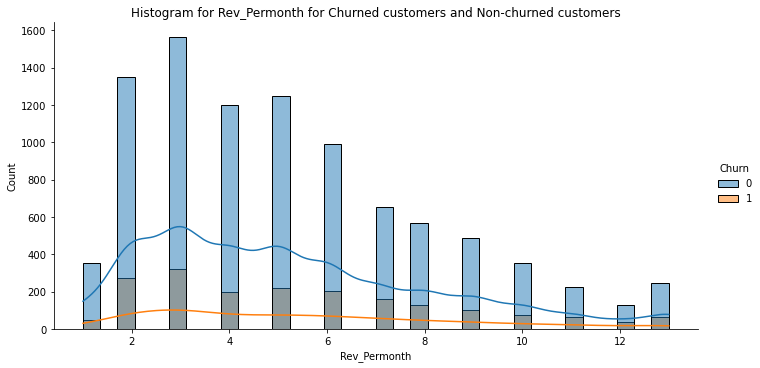

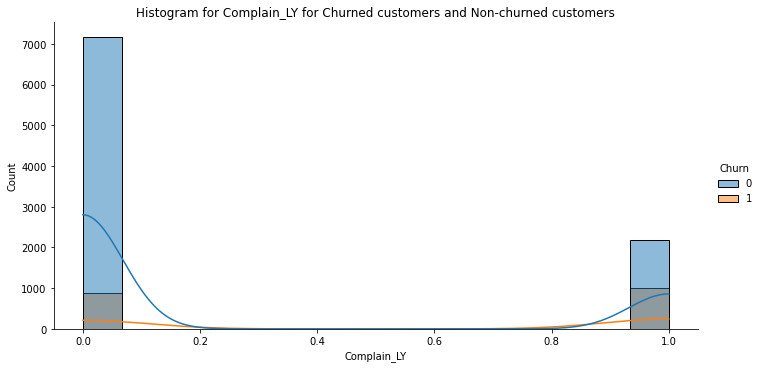

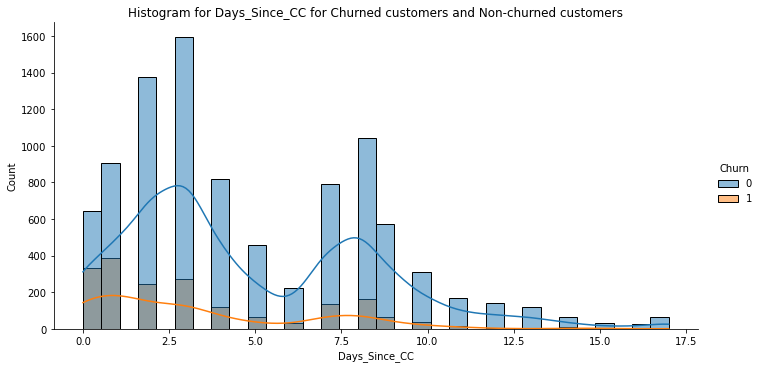

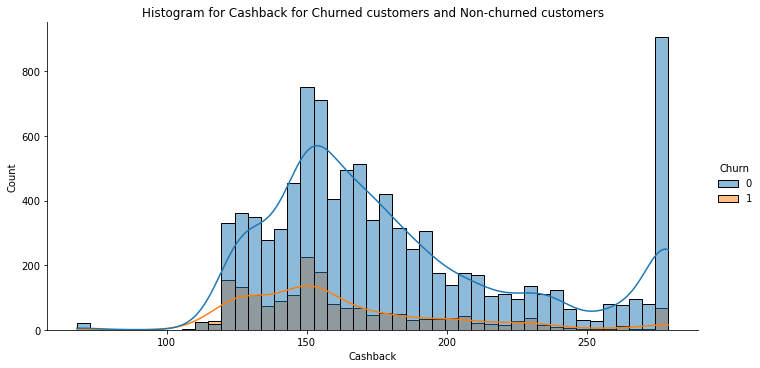

In [153]:
for i in num_cols:
    sns.displot(x=df_total[i], hue=df_total['Churn'], kind='hist', kde=True, aspect=2)
    plot_title = "Histogram for " + i + " for Churned customers and Non-churned customers"
    plt.title(plot_title)
    plt.show();

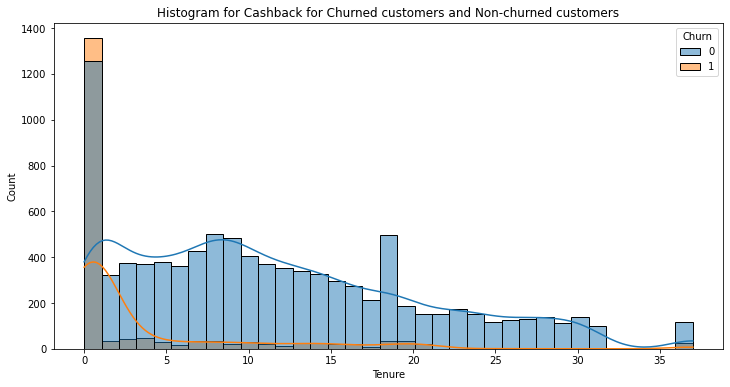

In [154]:
plt.figure(figsize=(12,6))
sns.histplot(x=df_total['Tenure'], kde=True, bins = 35, hue=df_total['Churn'])
plot_title = "Histogram for " + i + " for Churned customers and Non-churned customers"
plt.title(plot_title)
plt.show();

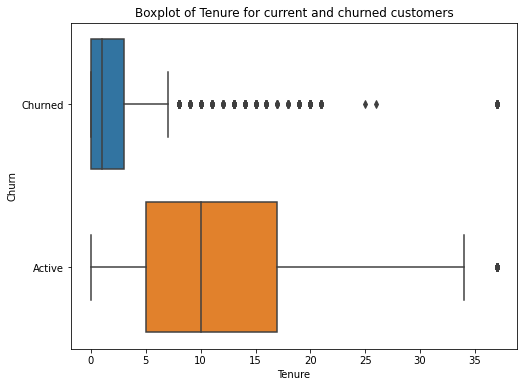

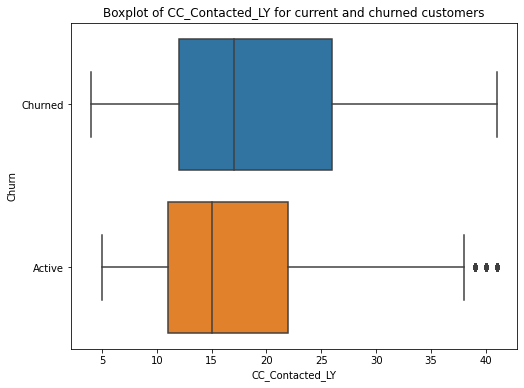

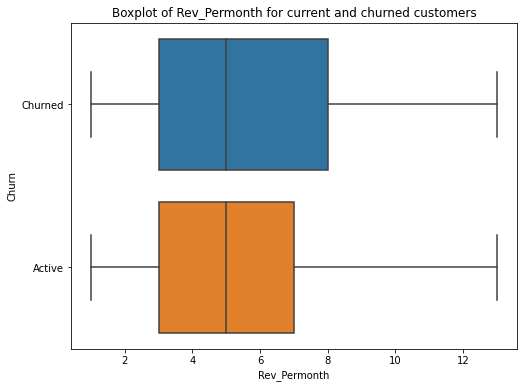

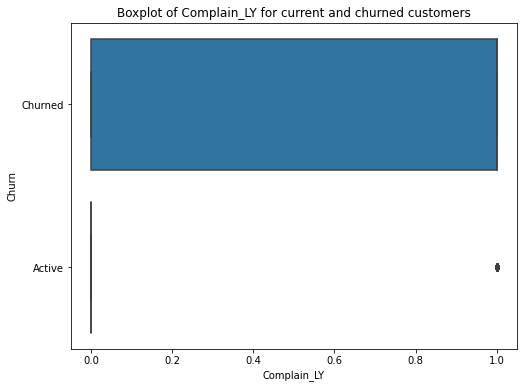

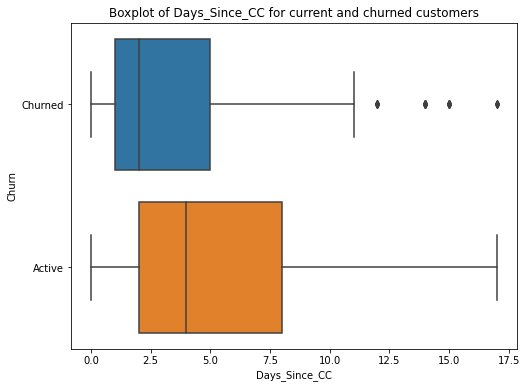

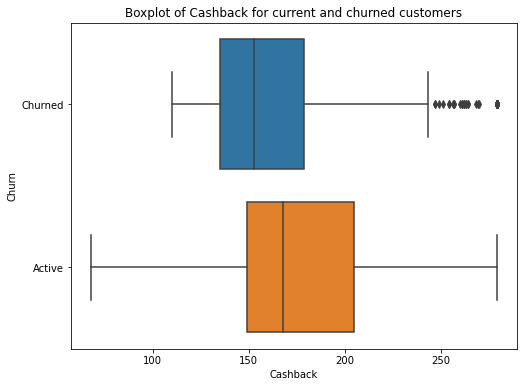

In [155]:
df_total_churn = df_total['Churn'].replace( {1: 'Churned', 0: 'Active'} ) ## y needs to be categorical
for i in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_total[i], y=df_total_churn)
    plot_title = 'Boxplot of ' + i + " for current and churned customers"
    plt.title(plot_title)
    plt.show();

## Clustering using KPrototypes for categorical and numerical variables

This is the clustering algorithm that has been put in the report. The above trials are all experimental. Using K-prototype is better than using K-means as this involves categorical fields also.

In [156]:
# !pip install kmodes (installed and then commented)

In [157]:
X.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'User_Count',
       'CC_Score', 'Rev_Permonth', 'Complain_LY', 'Days_Since_CC', 'Cashback',
       'Payment_Creditcard', 'Payment_Debitcard', 'Payment_Ewallet',
       'Payment_UPI', 'Gender_Male', 'ACSegment_Regular',
       'ACSegment_Regularplus', 'ACSegment_Super', 'ACSegment_Superplus',
       'Maritalstatus_Married', 'Maritalstatus_Single', 'Logindevice_Mobile'],
      dtype='object')

In [158]:
cat_columns_idx = [1,3,5,7,10,11,12,13,14,15,16,17,18,19,20,21]

#### Clusters=2

In [159]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=20)
kproto.fit(X, categorical=cat_columns_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1975, ncost: 54595.654997125734
Run: 1, iteration: 2/20, moves: 1250, ncost: 53790.74560408723
Run: 1, iteration: 3/20, moves: 768, ncost: 53397.202144571194
Run: 1, iteration: 4/20, moves: 585, ncost: 53042.66509578828
Run: 1, iteration: 5/20, moves: 279, ncost: 52957.09986274263
Run: 1, iteration: 6/20, moves: 46, ncost: 52955.465558392956
Run: 1, iteration: 7/20, moves: 11, ncost: 52955.38130946094
Run: 1, iteration: 8/20, moves: 2, ncost: 52955.3765603874
Run: 1, iteration: 9/20, moves: 0, ncost: 52955.3765603874
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 498, ncost: 53499.97558520225
Run: 2, iteration: 2/20, moves: 133, ncost: 53492.97956207073
Run: 2, iteration: 3/20, moves: 60, ncost: 53491.47595534128
Run: 2, iteration: 4/20, moves: 35, ncost: 53490.4169043226
Run: 2, iteration: 5/20, moves: 36, ncos

KPrototypes(gamma=0.38106030596163365, max_iter=20, n_clusters=2, verbose=2)

In [160]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[[-0.15129816 -0.02513561  0.01909844 -0.07736735 -0.63840174 -0.159173
  -0.71469661  0.13434419 -0.04819358 -0.6318668  -0.67312014 -0.82909407
  -0.34810764 -0.28062558  0.82437508 -0.22003893 -0.76020708 -0.75121463
  -0.27988834 -1.04172222 -0.67437405  0.71059496]
 [ 0.10614074  0.02969375 -0.03486438 -0.11378087  1.10184521  0.00595215
  -0.71469661  0.13434419 -0.04819358 -0.6318668  -0.67312014 -0.82909407
  -0.34810764 -0.28062558  0.82437508 -0.22003893 -0.76020708 -0.75121463
  -0.27988834  0.9599488  -0.67437405  0.71059496]]


In [161]:
# Prediction
clusters2 = kproto.predict(X, categorical=cat_columns_idx)

In [162]:
CC['kproto_2clusters'] = clusters2

In [163]:
CC.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,...,Payment_UPI,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,kproto_2clusters
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,...,0,0,0,0,1,0,0,1,1,0
1,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,...,1,1,0,1,0,0,0,1,1,0
2,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,...,0,1,0,1,0,0,0,1,1,0
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,...,0,1,0,0,1,0,0,1,1,0
4,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,...,0,1,0,1,0,0,0,1,1,0


In [164]:
CC[CC['kproto_2clusters']==1].head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,...,Payment_UPI,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,kproto_2clusters
5,1,0.0,1.0,22.0,3.0,NaN,5.0,2.0,1.0,7.0,...,0,0,0,1,0,0,0,1,0,1
10,1,4.0,NaN,18.0,2.0,3.0,3.0,2.0,0.0,8.0,...,0,0,1,0,0,0,0,0,1,1
14,1,9.0,3.0,15.0,3.0,4.0,2.0,2.0,0.0,7.0,...,0,1,0,0,0,0,0,1,1,1
20,1,0.0,3.0,12.0,3.0,5.0,3.0,5.0,1.0,7.0,...,0,1,0,0,0,0,0,0,1,1
21,1,20.0,1.0,29.0,3.0,3.0,2.0,2.0,0.0,6.0,...,0,0,0,0,0,0,0,0,1,1
28,0,18.0,1.0,15.0,2.0,3.0,4.0,9.0,0.0,15.0,...,0,1,0,0,1,0,1,0,1,1
29,0,5.0,3.0,14.0,2.0,3.0,2.0,2.0,0.0,7.0,...,0,0,0,0,0,0,0,1,0,1
33,0,13.0,3.0,10.0,3.0,4.0,2.0,8.0,0.0,11.0,...,0,1,0,0,0,0,0,0,1,1
38,0,30.0,1.0,30.0,2.0,2.0,2.0,NaN,NaN,4.0,...,0,1,0,0,0,0,1,0,1,1
41,0,14.0,1.0,20.0,2.0,3.0,3.0,5.0,0.0,8.0,...,0,1,0,1,0,0,1,0,1,1


In [165]:
clust2_profile=CC.copy()
clust2_profile=clust2_profile.groupby('kproto_2clusters').mean()
clust2_profile

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,...,Payment_Ewallet,Payment_UPI,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile
kproto_2clusters,,,,,,,,,,,,,,,,,,,,,
0,0.200642,9.802193,1.641618,17.709796,2.879893,3.712664,3.046853,6.428529,0.296893,2.250831,...,0.100251,0.074839,0.604999,0.023318,0.491204,0.338034,0.047752,0.493158,0.337196,0.669226
1,0.112006,13.161194,1.675462,18.141767,2.942118,3.658388,3.100789,6.246640,0.264996,8.774931,...,0.121767,0.069790,0.578575,0.086140,0.147877,0.400439,0.116154,0.568082,0.269644,0.656174


#### Clusters=3

In [166]:
kproto3 = KPrototypes(n_clusters=3, verbose=2, max_iter=20, random_state=1)
kproto3.fit(X, categorical=cat_columns_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2378, ncost: 48788.8088617667
Run: 1, iteration: 2/20, moves: 1234, ncost: 48021.6756368359
Run: 1, iteration: 3/20, moves: 694, ncost: 47865.03578174141
Run: 1, iteration: 4/20, moves: 470, ncost: 47775.5048070835
Run: 1, iteration: 5/20, moves: 349, ncost: 47718.16403189902
Run: 1, iteration: 6/20, moves: 504, ncost: 47526.2545190835
Run: 1, iteration: 7/20, moves: 552, ncost: 47362.23712662446
Run: 1, iteration: 8/20, moves: 540, ncost: 47168.357622790056
Run: 1, iteration: 9/20, moves: 499, ncost: 47003.034998273906
Run: 1, iteration: 10/20, moves: 314, ncost: 46946.90559255801
Run: 1, iteration: 11/20, moves: 125, ncost: 46937.187502484296
Run: 1, iteration: 12/20, moves: 43, ncost: 46935.90445346347
Run: 1, iteration: 13/20, moves: 12, ncost: 46935.81860815912
Run: 1, iteration: 14/20, moves: 8, ncost: 46935.768678507295
Run: 1, iteration: 15/20, moves: 3, ncost: 46935.

Run: 10, iteration: 8/20, moves: 8, ncost: 47756.896896905215
Run: 10, iteration: 9/20, moves: 1, ncost: 47756.89518414609
Run: 10, iteration: 10/20, moves: 0, ncost: 47756.89518414609
Best run was number 9


KPrototypes(gamma=0.38106030596163365, max_iter=20, n_clusters=3,
            random_state=1, verbose=2)

In [167]:
# Prediction
clusters3 = kproto3.predict(X, categorical=cat_columns_idx)
CC['kproto_3clusters'] = clusters3

In [168]:
clust3_profile=CC.copy()
clust3_profile=clust3_profile.groupby('kproto_3clusters').mean()
clust3_profile

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,...,Payment_UPI,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,kproto_2clusters
kproto_3clusters,,,,,,,,,,,,,,,,,,,,,
0,0.187416,9.499015,1.600000,13.305577,2.855501,3.675453,3.056379,6.323737,0.292164,2.219717,...,0.075468,0.609535,0.026057,0.540822,0.306312,0.044393,0.464196,0.359390,0.671492,0.007528
1,0.096765,13.621100,1.715588,14.997355,2.925544,3.669191,3.102383,6.149150,0.253474,8.873577,...,0.072574,0.585835,0.101428,0.132031,0.392888,0.114252,0.572136,0.270184,0.660157,0.967356
2,0.223943,10.643872,1.679526,30.488770,2.964625,3.757564,3.039710,6.714170,0.313060,3.826087,...,0.068731,0.580060,0.013973,0.328172,0.425604,0.074018,0.563444,0.276057,0.656344,0.279456


In [169]:
CC.groupby('kproto_3clusters')['Churn'].count()

kproto_3clusters
0    5181
1    3431
2    2648
Name: Churn, dtype: int64

In [170]:
clust3_profile.to_excel("cluster_profile.xlsx")

#### Clusters = 4

In [171]:
kproto4 = KPrototypes(n_clusters=4, verbose=2, max_iter=20)
kproto4.fit(X, categorical=cat_columns_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 3154, ncost: 45703.7999926614
Run: 1, iteration: 2/20, moves: 2058, ncost: 43160.269088403395
Run: 1, iteration: 3/20, moves: 988, ncost: 42839.70715016913
Run: 1, iteration: 4/20, moves: 255, ncost: 42819.06947504583
Run: 1, iteration: 5/20, moves: 65, ncost: 42817.4728958889
Run: 1, iteration: 6/20, moves: 7, ncost: 42817.427204048756
Run: 1, iteration: 7/20, moves: 0, ncost: 42817.427204048756
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 4117, ncost: 45236.46817881408
Run: 2, iteration: 2/20, moves: 1404, ncost: 44834.83779361001
Run: 2, iteration: 3/20, moves: 717, ncost: 44635.215681301284
Run: 2, iteration: 4/20, moves: 878, ncost: 44110.357498245685
Run: 2, iteration: 5/20, moves: 842, ncost: 43685.31473004415
Run: 2, iteration: 6/20, moves: 674, ncost: 43424.420891962036
Run: 2, iteration: 7/20, moves:

Run: 9, iteration: 10/20, moves: 316, ncost: 42818.52326963961
Run: 9, iteration: 11/20, moves: 309, ncost: 42801.425171440926
Run: 9, iteration: 12/20, moves: 84, ncost: 42797.93063473776
Run: 9, iteration: 13/20, moves: 48, ncost: 42795.72398611859
Run: 9, iteration: 14/20, moves: 39, ncost: 42794.42612408552
Run: 9, iteration: 15/20, moves: 37, ncost: 42793.045232381766
Run: 9, iteration: 16/20, moves: 27, ncost: 42792.566193604514
Run: 9, iteration: 17/20, moves: 11, ncost: 42792.466568758035
Run: 9, iteration: 18/20, moves: 8, ncost: 42792.386291276634
Run: 9, iteration: 19/20, moves: 4, ncost: 42792.364205078025
Run: 9, iteration: 20/20, moves: 0, ncost: 42792.364205078025
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/20, moves: 4163, ncost: 45024.19403713327
Run: 10, iteration: 2/20, moves: 1650, ncost: 43911.76605566402
Run: 10, iteration: 3/20, moves: 1238, ncost: 43219.48263379387
Run: 10, iteration: 4/20, moves: 841, nc

KPrototypes(gamma=0.38106030596163365, max_iter=20, n_clusters=4, verbose=2)

In [172]:
# Prediction
clusters4 = kproto4.predict(X, categorical=cat_columns_idx)
CC['kproto_4clusters'] = clusters4

In [173]:
clust4_profile=CC.copy()
clust4_profile=clust4_profile.groupby('kproto_4clusters').mean()
clust4_profile

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,...,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,kproto_2clusters,kproto_3clusters
kproto_4clusters,,,,,,,,,,,,,,,,,,,,,
0,0.141136,9.565004,1.632128,14.353043,2.516678,2.564166,3.079122,6.013955,0.289922,3.193182,...,0.610671,0.023408,0.440620,0.367298,0.055766,0.526334,0.306368,0.675731,0.222375,0.354217
1,0.221586,10.921005,1.670080,31.431869,2.971162,3.826287,3.053405,6.635975,0.303774,3.968022,...,0.573128,0.013656,0.322026,0.420705,0.079295,0.548899,0.281498,0.657269,0.307930,1.996035
2,0.218649,9.532612,1.620977,13.682956,3.105718,4.378237,3.024434,6.575997,0.299514,2.496486,...,0.601652,0.025966,0.536441,0.303334,0.038950,0.455297,0.372676,0.670404,0.024491,0.133078
3,0.089763,14.566452,1.705243,15.467464,3.004865,3.948897,3.116766,6.241435,0.246723,9.398628,...,0.589763,0.123516,0.109421,0.375371,0.127596,0.571958,0.270030,0.650964,0.990356,1.007418


**Observations**: The function does not provide silhouette score directly. But observing the cluster profiles, 3 clusters seems to have good separation rather than 4 clusters.

 ## Writing 3 cluster numbers in files with and w/o outliers

In [174]:
CC_with_outlier['Clusters'] = clusters3
CC_with_outlier.to_csv("CC_with_outlier.csv", index=False)

In [175]:
df_total['Clusters'] = clusters3
df_total.to_csv('CC_without_outlier.csv', index=False)

## Analysis of key variables to gain further insights

### Cashback and Coupon used for payment variables against Churn and Tenure (low and high bins)

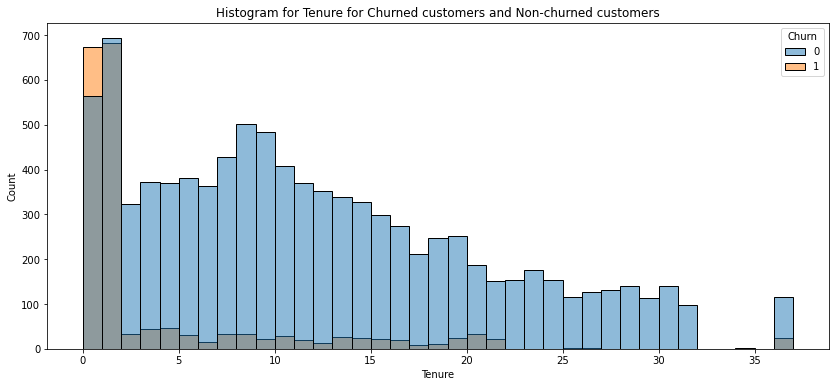

In [176]:
plt.figure(figsize=(14,6))
sns.histplot(x=df_total['Tenure'], bins = 37, hue=df_total['Churn'])
plot_title = "Histogram for " + "Tenure" + " for Churned customers and Non-churned customers"
plt.title(plot_title)
plt.show();

**Observations:** From the above, it can be seen that churn is highest within the time period 0 to 2. In fact in the time period 0 to 1, the number of churning customers is more than the number of customers staying back. 

Now let us analyse current cashback scheme wrt churn and wrt tenure.

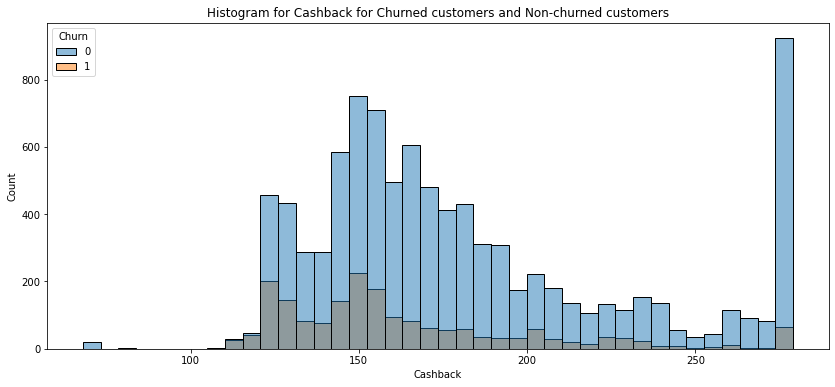

In [177]:
### Cashback histplot wrt churn

plt.figure(figsize=(14,6))
sns.histplot(x=df_total['Cashback'], bins = 40, hue=df_total['Churn'])
plot_title = "Histogram for " + "Cashback" + " for Churned customers and Non-churned customers"
plt.title(plot_title)
plt.show();

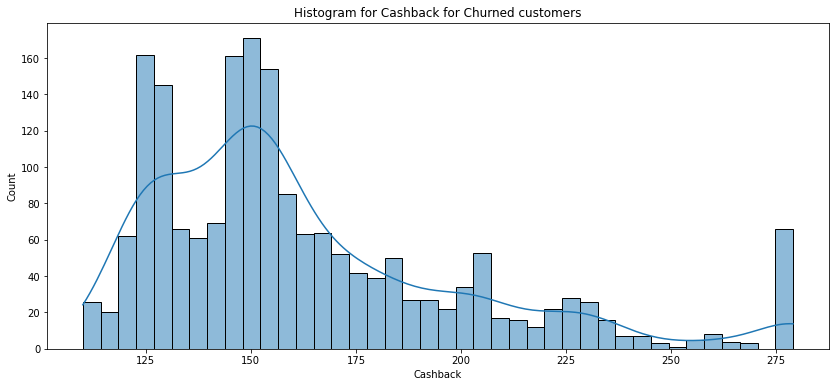

In [178]:
### Cashback offers for only churned customers

plt.figure(figsize=(14,6))
sns.histplot(x=df_total[df_total['Churn']==1]['Cashback'], kde=True, bins = 40)
plot_title = "Histogram for " + "Cashback" + " for Churned customers"
plt.title(plot_title)
plt.show();

In [211]:
### MEDIAN CASHBACK FOR CHURNED AND NON-CHURNED CUSTOMERS

df_total[df_total['Churn']==1]['Cashback'].median(), df_total[df_total['Churn']==0]['Cashback'].median()

(153.0, 168.0)

In [213]:
### Statistical description of cashback for churned customers

pd.DataFrame(df_total[df_total['Churn']==1]['Cashback'].describe() )

,Cashback
count,1896.000000
mean,163.103376
std,38.422260
min,110.000000
25%,135.000000
50%,153.000000
75%,179.000000
max,279.000000


In [214]:
### Statistical description of cashback for active customers

pd.DataFrame(df_total[df_total['Churn']==0]['Cashback'].describe() )

,Cashback
count,9364.000000
mean,181.617044
std,46.632509
min,68.000000
25%,149.000000
50%,168.000000
75%,205.000000
max,279.000000


In [179]:
df_temp=df_total.copy()

In [180]:
df_temp['Tenure_bin'] = np.where(df_temp['Tenure'] <= 2 , 'Tenure<=2', 'Other_Tenure')

In [181]:
df_temp['Tenure_bin'].value_counts()

Other_Tenure    8288
Tenure<=2       2972
Name: Tenure_bin, dtype: int64

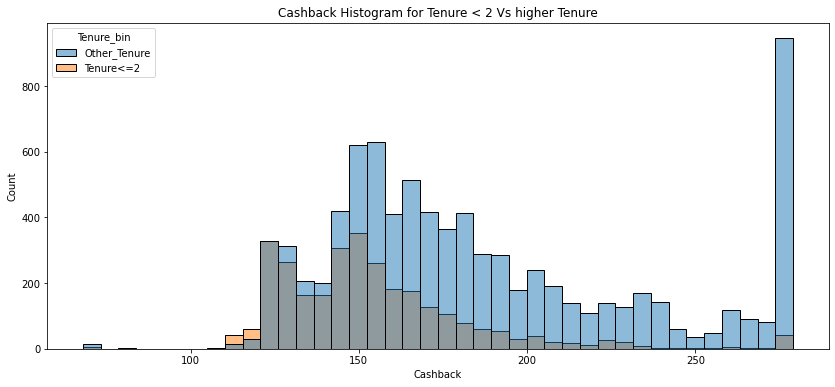

In [182]:
## Histplot of cashback with Tenure as hue

plt.figure(figsize=(14,6))
sns.histplot(x=df_temp['Cashback'], bins = 40, hue=df_temp['Tenure_bin'])
plot_title = "Cashback Histogram" + " for Tenure < 2 Vs higher Tenure"
plt.title(plot_title)
plt.show();

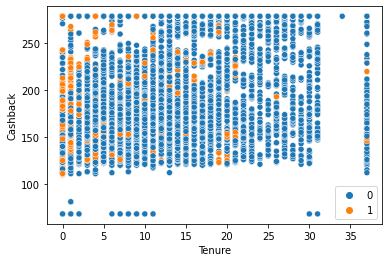

In [183]:
### Scatter plot of Tenure and Cashback

sns.scatterplot(x=df_total['Tenure'], y=df_total['Cashback'], hue=df_total['Churn'])
plt.legend(loc='lower right');

In [184]:
### 
CC_predictor.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [185]:
### Copying this and adding churn field

CC_temp = CC_predictor.copy()
CC_temp['Churn'] = df_total['Churn']

In [186]:
### Analysis of coupon_used_for_payment

CC_temp.coupon_used_for_payment.value_counts()

1.0     4373
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
10.0      34
9.0       34
11.0      30
12.0      26
13.0      22
14.0      12
16.0       4
15.0       4
Name: coupon_used_for_payment, dtype: int64

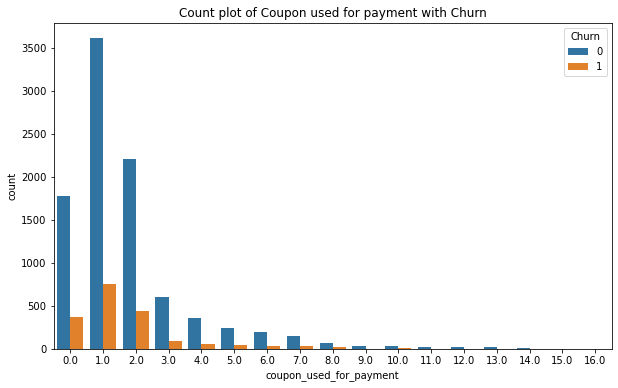

In [187]:
### Distribution of coupon_used_for_payment by churn

plt.figure(figsize=(10,6))
sns.countplot(data = CC_temp, x='coupon_used_for_payment', hue='Churn')
plot_title = "Count plot of "+"Coupon used for payment"+" with Churn"
plt.title(plot_title)
plt.show();


In [188]:
CC_temp['Tenure_bin'] = df_temp['Tenure_bin']

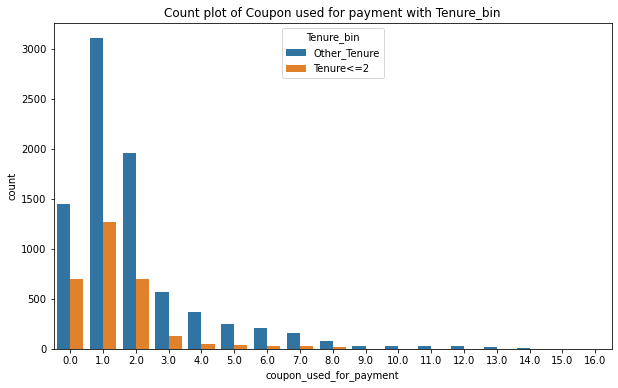

In [189]:
### Distribution of coupon_used_for_payment by tenure bin

plt.figure(figsize=(10,6))
sns.countplot(data = CC_temp, x='coupon_used_for_payment', hue='Tenure_bin')
plot_title = "Count plot of "+"Coupon used for payment"+" with Tenure_bin"
plt.title(plot_title)
plt.show();


**Insights:** In the above plot, we can see that coupons have not been used by close to 700 customers with tenure less than 2.  This is the segment that has the most churn. Also, cashback is less for tenure less than 2. This is the segment that needs to have more cashback and more coupons to encourage them to stay with the provider company. Whereas our analysis indicates the contrary.

**Recommendations** We do not know what the earlier coupon or cashback programs were designed to do (this is specified as a constraint in ppt), but it is recommended to re-look at the customer segment that these loyalty programs are addressing. It might help reduce churn if customers with tenure less than 2 are focussed on for more initial coupons and cashback programs. 

### Days since customer care contact, CC contacted last year, Complaint raised last year 

In [190]:
CC_temp.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device', 'Churn', 'Tenure_bin'],
      dtype='object')

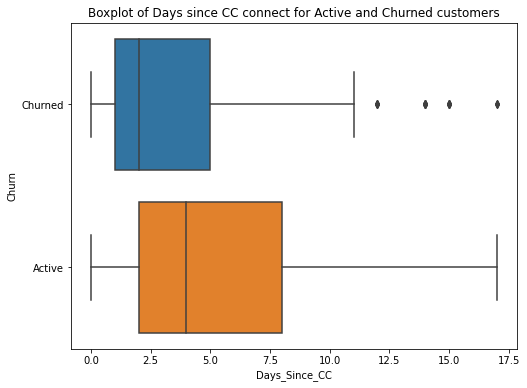

In [191]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_total["Days_Since_CC"], y=df_total_churn)
plot_title = 'Boxplot of ' + "Days since CC connect" + " for Active and Churned customers"
plt.title(plot_title)
plt.show();

**Observations:** Around 75% of churned customers left within 5 days after last contact with Customer care. Around 50% left within 2 days after last contact with customer care. 

**Recommendations** We could say, there should be a follow-up with customers once customer care is contacted to ensure that they are satisfied with the resolution. Just like tenure<2 is high risk for churn, within 5 days of customer care connect is also a period to be watched out for. Perhaps last call records (if available) for historical churned customers may provide further inputs to whether these customers were satisfied or dissatisfied. A feedback call to get a sense of satisfaction of these customers may help zero in on the customers who were dissatisfied. 

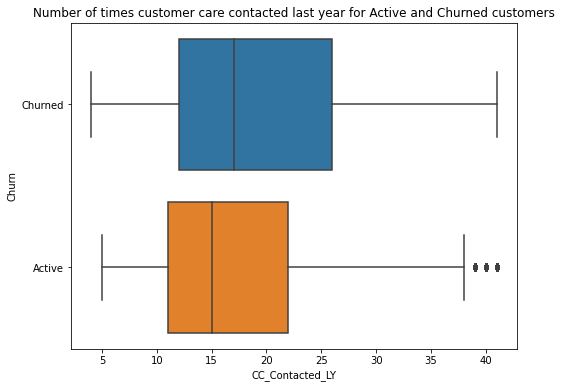

In [192]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_total["CC_Contacted_LY"], y=df_total_churn)
plot_title = 'Number of times ' + "customer care contacted last year" + " for Active and Churned customers"
plt.title(plot_title)
plt.show();

**Insights:** Around 50% of churned customers have contacted customer care more than 17 times and 25% of churned customers more than 27 times in the previous one year. Compared to this, 50% of active customers have contacted 15 times or more and 25% of active customers have contacted more than 22 times. 

**Recommendations** When customers contact more than 20 times, it might be a warning sign and there needs to be more focussed retention measures given to these customers. 

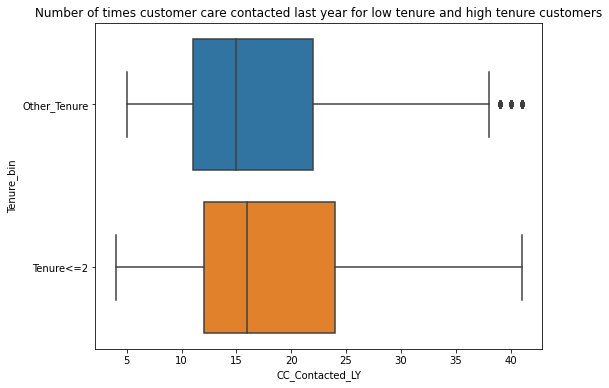

In [193]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_temp["CC_Contacted_LY"], y=df_temp['Tenure_bin'])
plot_title = 'Number of times ' + "customer care contacted last year" + " for low tenure and high tenure customers"
plt.title(plot_title)
plt.show();

**Observations:** We have already seen that tenure was correlated with churn. For tenure less than 2, the number of times customer care was contacted is more than high tenure customers. 

Complain_LY       0.0       1.0
Churn                          
0            0.765592  0.234408
1            0.464135  0.535865


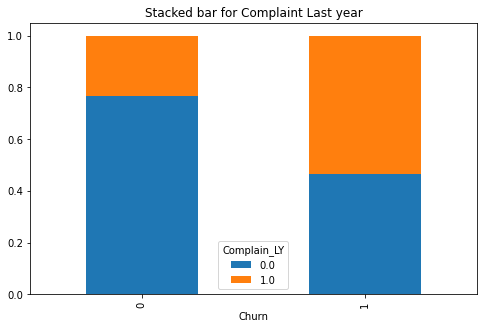

In [194]:
### How Complaint last year impacts customer churn


tab = pd.crosstab(df_temp['Churn'],df_temp['Complain_LY'],normalize='index')
print(tab)
    #plt.figure(figsize=(12,6))
tab.plot(kind='bar', stacked = True, figsize=(8,5))
plot_title = "Stacked bar for " + "Complaint Last year"
plt.title(plot_title)
plt.show();

In [195]:
Churn_count = df_temp[df_temp['Churn']==0]['Churn'].count()
Active_count = df_temp[df_temp['Churn']==1]['Churn'].count()

In [196]:
Churn_count, Active_count

(9364, 1896)

In [197]:
Churn_complaint = df_temp[(df_temp['Churn']==0) & (df_temp['Complain_LY']==1)]['Churn'].count()
Active_complaint = df_temp[(df_temp['Churn']==1) & (df_temp['Complain_LY']==1)]['Churn'].count()

In [198]:
Churn_complaint, Active_complaint

(2195, 1016)

In [199]:
tab = pd.crosstab(df_temp['Churn'],df_temp['Complain_LY'],normalize='index', margins=True)
print(tab)

Complain_LY       0.0       1.0
Churn                          
0            0.765592  0.234408
1            0.464135  0.535865
All          0.714831  0.285169


In [200]:
tab = pd.crosstab(df_temp['Complain_LY'],df_temp['Churn'],normalize='index') #, margins=True)
print(tab)

Churn               0         1
Complain_LY                    
0.0          0.890670  0.109330
1.0          0.683588  0.316412


Text(0.5, 1.0, '%Churn for customers with and without complaint')

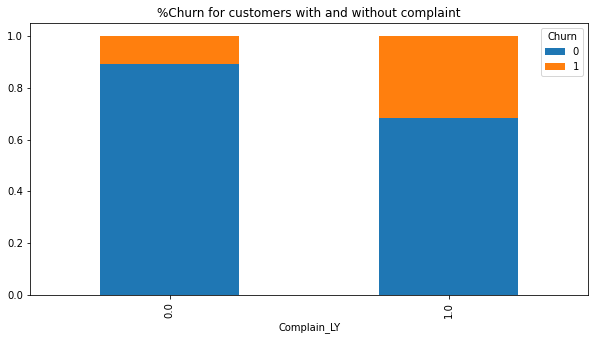

In [201]:
tab.plot(kind='bar', stacked = True, figsize=(10,5))
plt.title("%Churn for customers with and without complaint")

**Insights**: 23% of active customers had made atleast one complaint last year whereas 54% of churned customers had made atleast one complaint the previous year. Put another way, 11% of customers who had not made a complaint and 32% of customers who had made a complaint had churned. 

**Recommendations**: We do not have details of when and whether customer complaints were followed up to closure and if there were any service level thresholds for this. In case SLAs are not defined, it would be recommended to define SLAs for addressing customer complaints and record customer satisfaction levels post resolution. 

### Revenue per month

In [202]:
tab = pd.crosstab(df_temp['Rev_Permonth'],df_temp['Churn'],normalize='index', margins=False).round(2)*100
print(tab)

Churn            0     1
Rev_Permonth            
1.0           88.0  12.0
2.0           83.0  17.0
3.0           83.0  17.0
4.0           86.0  14.0
5.0           85.0  15.0
6.0           83.0  17.0
7.0           80.0  20.0
8.0           82.0  18.0
9.0           83.0  17.0
10.0          82.0  18.0
11.0          78.0  22.0
12.0          77.0  23.0
13.0          79.0  21.0


In [203]:
df_revenue_pm = pd.DataFrame(tab.astype('int64'), columns=['Active','Churned'])

In [204]:
df_revenue_pm['Active'] = tab[0]
df_revenue_pm['Churned'] = tab[1]

In [205]:
df_revenue_pm

,Active,Churned
Rev_Permonth,,
1.0,88.0,12.0
2.0,83.0,17.0
3.0,83.0,17.0
4.0,86.0,14.0
5.0,85.0,15.0
6.0,83.0,17.0
7.0,80.0,20.0
8.0,82.0,18.0
9.0,83.0,17.0


<AxesSubplot:xlabel='Rev_Permonth'>

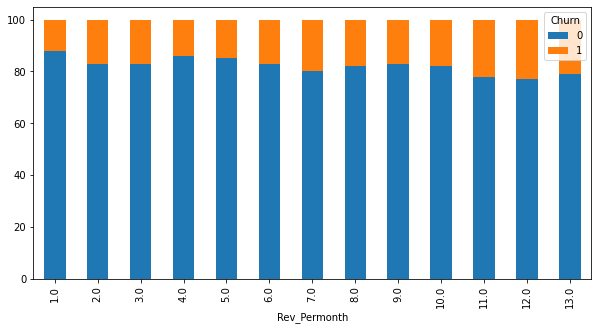

In [206]:
tab.plot(kind='bar', stacked = True, figsize=(10,5))

In [207]:
df_temp['Rev_low_high'] = np.where(df_temp['Rev_Permonth'] <= 6 , 'Low Revenue', 'High Revenue')

Churn                0         1
Rev_low_high                    
High Revenue  0.807214  0.192786
Low Revenue   0.841728  0.158272


<AxesSubplot:xlabel='Rev_low_high'>

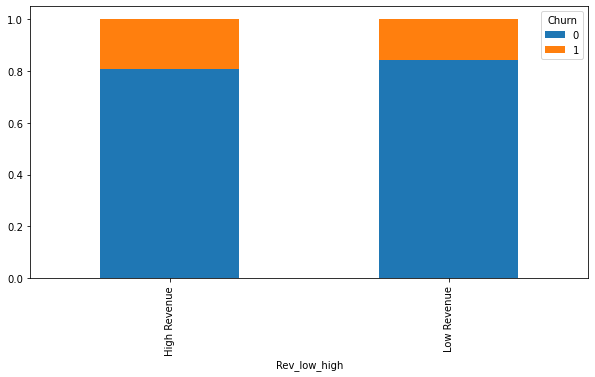

In [208]:
tab_revenue = pd.crosstab(df_temp['Rev_low_high'],df_temp['Churn'],normalize='index') #, margins=True)
print(tab_revenue)
tab_revenue.plot(kind='bar', stacked = True, figsize=(10,5))

Rev_low_high  High Revenue  Low Revenue
Churn                                  
0                 0.284387     0.715613
1                 0.335443     0.664557


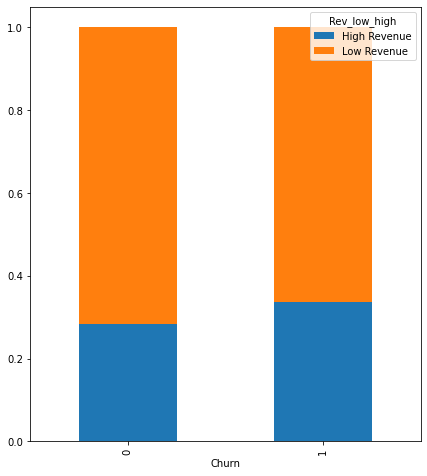

In [209]:
tab_revenue2 = pd.crosstab(df_temp['Churn'],df_temp['Rev_low_high'],normalize='index') #, margins=True)
print(tab_revenue2)
tab_revenue2.plot(kind='bar', stacked = True, figsize=(7,8));

**Conclusion** 

<i> **Immediate action:** </i>
1) In terms of customer retention campaign, a one-time campaign can probably be done for the predicted churn customers. 

Based on the analysis, some risk factors were also observed which may need addressing in the long term. Recommendations 2 to 5 are suggestions for the long term. 

<i> **Long term actions:** </i>

2) New customers who are in the first two months of account setup need to be given more focus and any hiccups addressed to ensure that they stay beyond that period to become long term customers.  

3) Customers who have either made a complaint or called customer care multiple times need to be focussed on and their complaints redressed in a timely manner. Customer Care and Services/Plans of the product may need to be aligned better with customer expectations to ensure more customer satisfaction. 

4) Within these group of customers, high revenue per month customers need to be focussed on as loss of these customers would impact the company more and there is also more churn observed in high revenue customers. 

5) Current retention initiatives such as cashback and coupons need to cover the above high risk group of customers. 

## The End of Project notes-1